# Project: Investigate a Dataset - [IMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This Dataset Is called TMDB Movies,It contains More Than 10 thousand Movies and their attributes such as The movie title, cast, budget, revenues, date of release and year of release... etc. 


### Question(s) for Analysis
    Question 1 : How are Movies Changing Throughout Years? 
    Question 2 : What Are the properties of A high profit Movie?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

## Data Loading and Exploring general properties:

In [3]:
#Data Loading and Previewing
imdb_df=pd.read_csv("Database_TMDb_movie_data/tmdb_movies.csv")
imdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### We need to Remove unnecessary Columns which are:
    1-ID
    2-IMDB ID
    3-Homepage
    4-Tagline
    5-keywords
    6-Overview
    7-Vote Count

### Checking Data Types


In [4]:
imdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### We need to convert:
    1-The Release Date into Date-Time Format


### Checking Missing Values

In [5]:
imdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### There are some missing values in this dataset, however, I believe they are Neither Critical in some instances nor large enough in others to affect my overall analysis, so I've elected to not take any actions regarding them.

### Checking Duplictes

In [6]:
imdb_df.duplicated().sum()

1

### There's A single duplicated row in this Dataset that needs to be removed.


## Now: On to Our Data Cleaning 
    We will preform 3 Cleaning Operations:
    1-Removing Previously Mentioned Unecessary Columns
    2-Correcting Wrong Data Types
    3-Removing Duplictes

### 1-Removing Previously Mentioned Unecessary Columns:

In [7]:
unecessary_columns=["id","imdb_id","homepage","tagline","keywords","overview","vote_count"]
imdb_df.drop(unecessary_columns,axis=1,inplace=True)

#### Checking if Said columns were removed: 

In [8]:
imdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


#### Columns Removed Successfully! 

### 2-Correcting Wrong Data Types:

In [9]:
# Data types Conversion to Date Time Format
imdb_df["release_date"]=pd.to_datetime(imdb_df["release_date"])
#I tried the following code once but found it would be inconvineint so I removed it
# imdb_df["release_year"]=pd.to_datetime(imdb_df["release_year"])


#### Checking if they were Converted: 

In [10]:
imdb_df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### They were Successfully Converted!

### 3-Removing Duplictes:

In [11]:
imdb_df.drop_duplicates(inplace=True)

#### Checking To see if They Were Removed:

In [12]:
imdb_df.duplicated().sum()

0

#### They were Successfully Removed! 

### Now that we have finished Cleaning our data, on to the Next Step: Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : How are Movies Changing Throughout Years? :
    Here, We will explore how the movies change throughout years with respect to:
    1-Movie Generes
    2-Movie Budgets
    3-Movie Revenues
    4-Movie Ratings

### Research Answer 1: How are movies changing with respect To:

#### 1-Movie Genres:
    Let's Explore How many movie Genres Are there and how they change throughout years:

First : let's define a function that seperates genres inside cells,puts each one into a pandas series then counts the occurences of each genre to Determine the most popular Genre throughout years:

In [13]:
def counter(attribute):
    attribute_series = pd.Series(imdb_df[attribute].str.cat(sep = '|').split(sep = '|'))
    #attribute_values = attribute_series.split(sep = '|'))
    attribute_count = attribute_series.value_counts()
    return attribute_count 

Now:A function That takes this series and converts it into a dictionary to later use it in plotting relations:

In [14]:
def dictionary_creator(series):
    dictionary=series.to_dict()
    return dictionary

Third:Let"s define two functions that takes This Dictionary and plot it as a bar graph or a pie chart:

In [15]:
#Bar Graph
def bar_plotter(dictionary_creator):
    figsize=(200,200)
    names = list(dictionary_creator.keys())
    values = list(dictionary_creator.values())
    plt.bar(range(len(dictionary_creator)), values, tick_label=names)
    plt.xticks(range(len(dictionary_creator)), names, rotation='vertical')
    plt.show()

In [16]:
#Pie Chart
def pie_plotter(dictionary_creator):
    figsize=(200,200)
    names = list(dictionary_creator.keys())
    values = list(dictionary_creator.values())
    plt.pie(values, labels=names,autopct='%.2f')
    plt.show()

Lastly: Two functions that graphs the required graph in a single Line:

In [17]:
#Bar Graph
def bar_grapher(attribute):
    bar_plotter(dictionary_creator(counter(attribute)))
    

In [18]:
#Pie Chart
def pie_chart(attribute):
    pie_plotter(dictionary_creator(counter(attribute)))

Now, Let's See what are the most and Least Popular Genres:

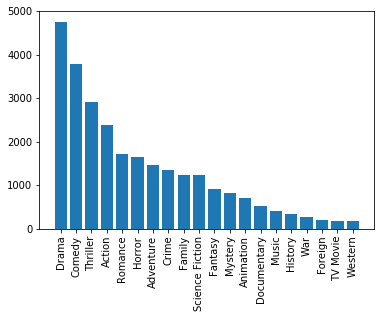

In [19]:
bar_grapher("genres")

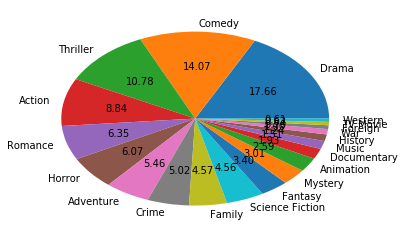

In [20]:
pie_chart("genres")

### As we can see, the highest 5 genres in terms of number of movies produced (Arranged Descendingly) are:
    1-Drama
    2-Comedy
    3-Thriller
    4-Action
    5-Adventure
### while the lowest 5 genres in terms of number of movies produced (Arranged Asscendingly) are:
    1-Western
    2-Tv Movie
    3-Foreign
    4-War
    5-History

### Now,Let's See how these genres change throughout years:

Let's create A function that separates each genre into a separate row in a dataframe,it then creates a dataframe that contains years of release as indices and conatins the number of movies created that year from each genre:

In [21]:
def separtor(df,attribute):
    new_df=df.copy()
    new_df[attribute] = new_df[attribute].str.split('|')
    new_df = new_df.explode(attribute)
    new_df=pd.crosstab(new_df['release_year'], new_df['genres']).rename_axis(columns=None).reset_index()
    return new_df

Next:We need A function that plots each genre's behaviour throughout Years:

In [22]:
def line_plotter(df):
    for col in df.columns:
        if not col == 'release_year':
            plt.figure(figsize=(12,6), dpi = 200)
            plt.plot(df['release_year'], df[col], label=col)
            plt.xlabel("Release Year", fontsize = 12)
            plt.ylabel(col, fontsize = 12)
    plt.legend()
    plt.show()

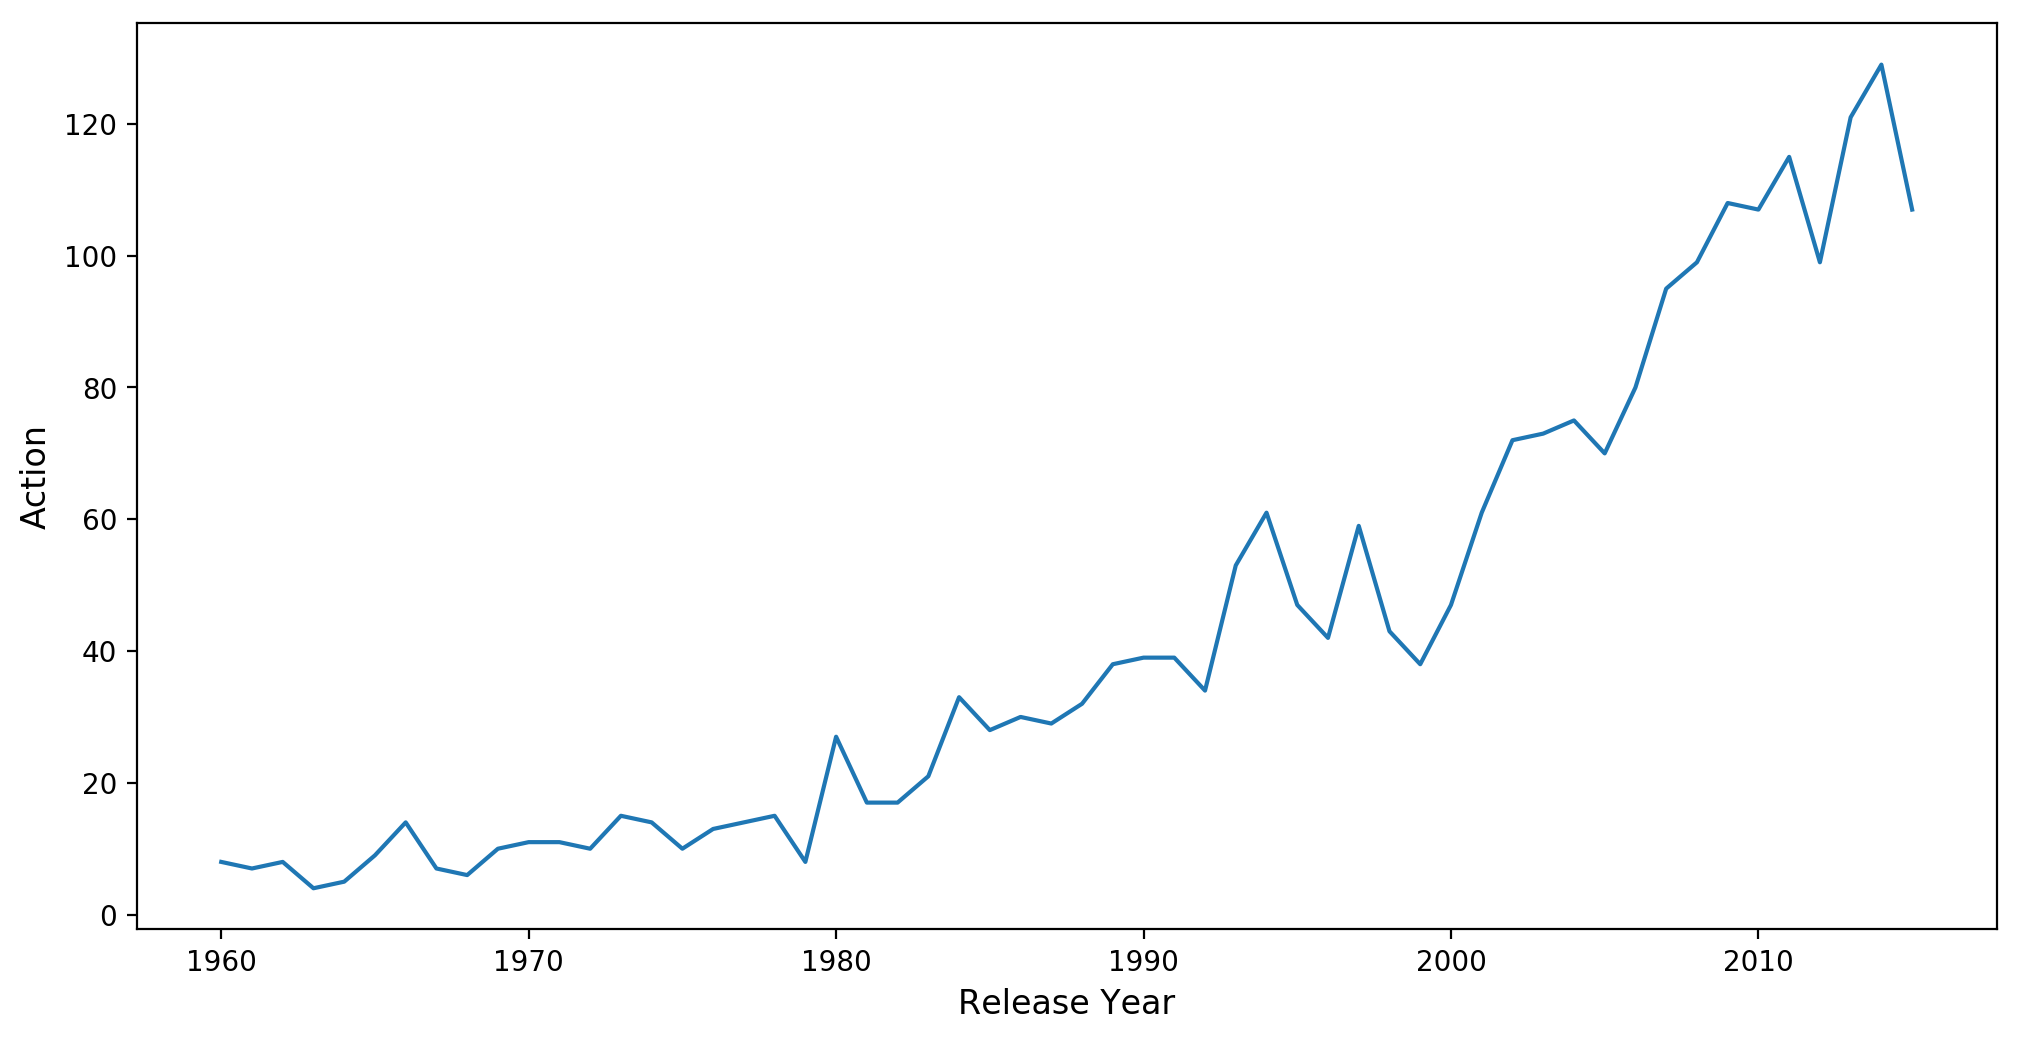

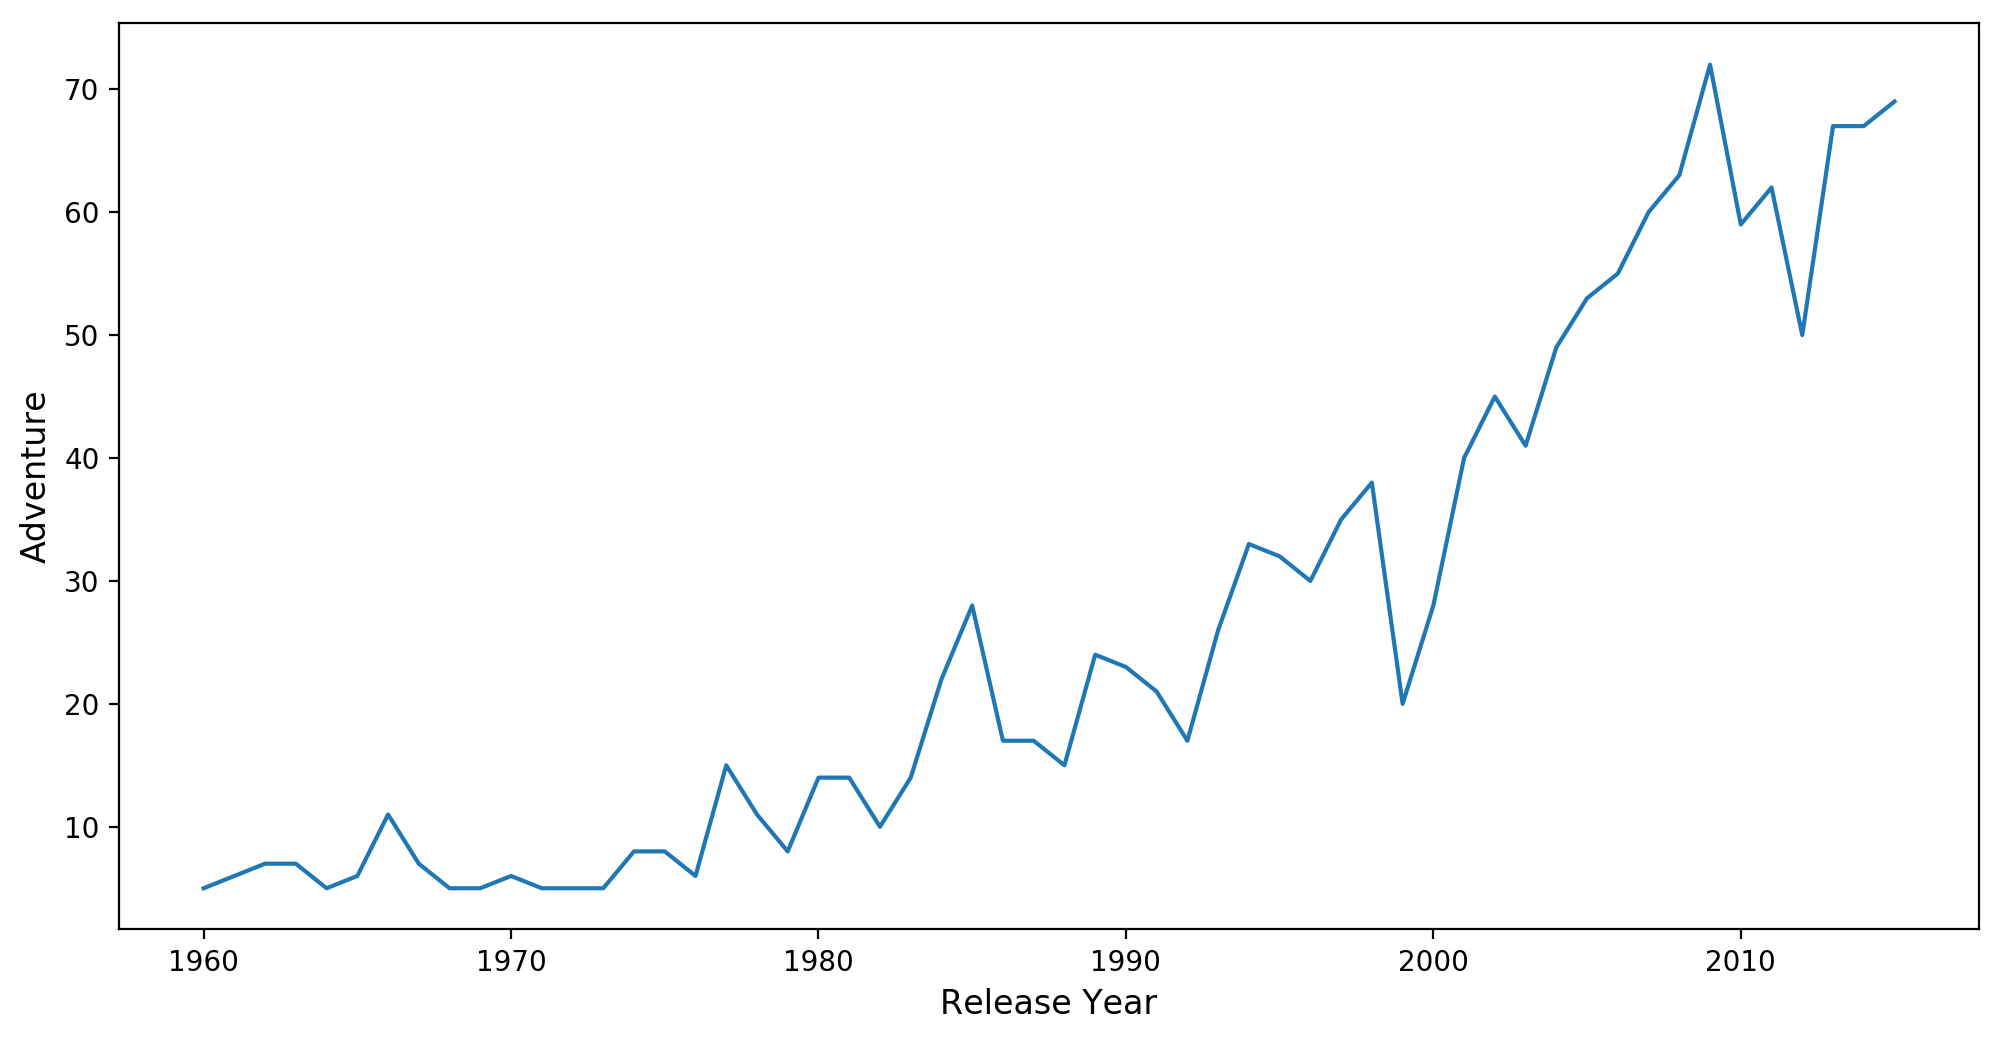

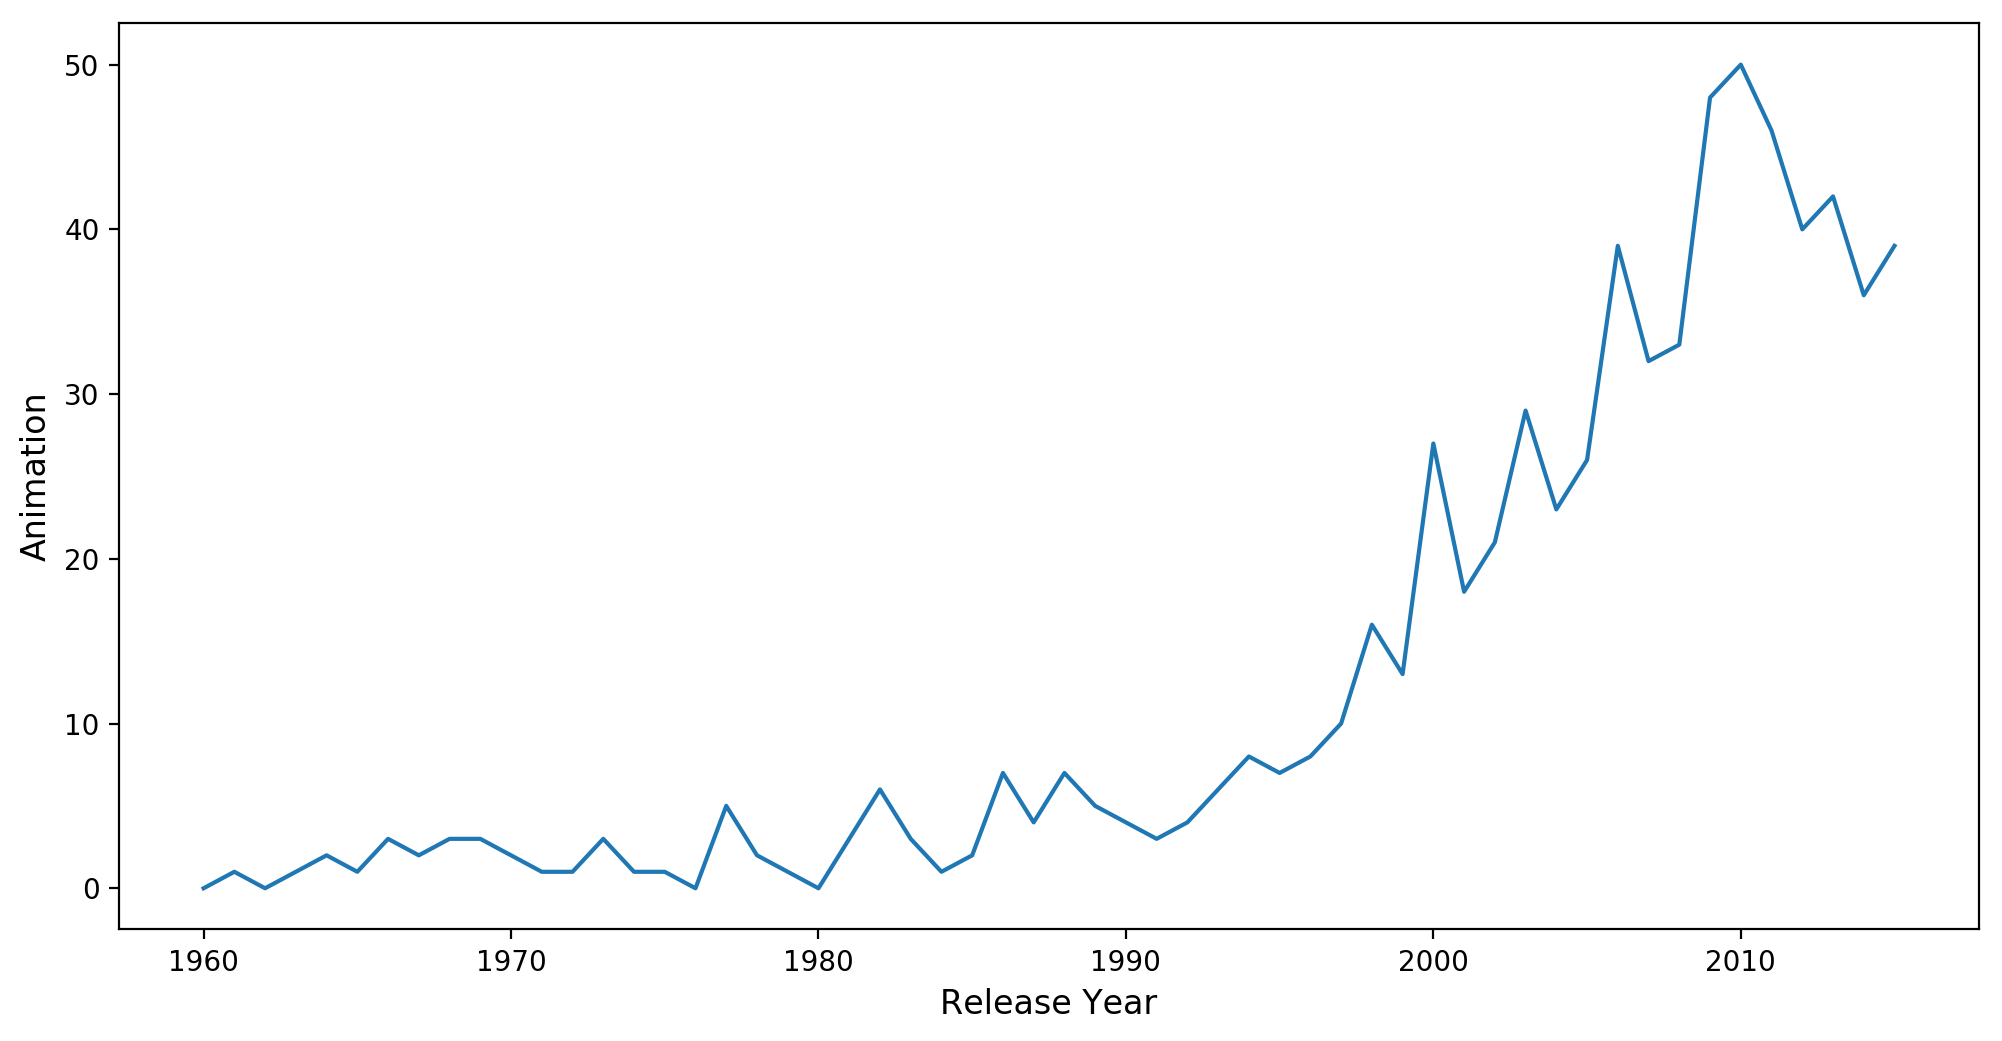

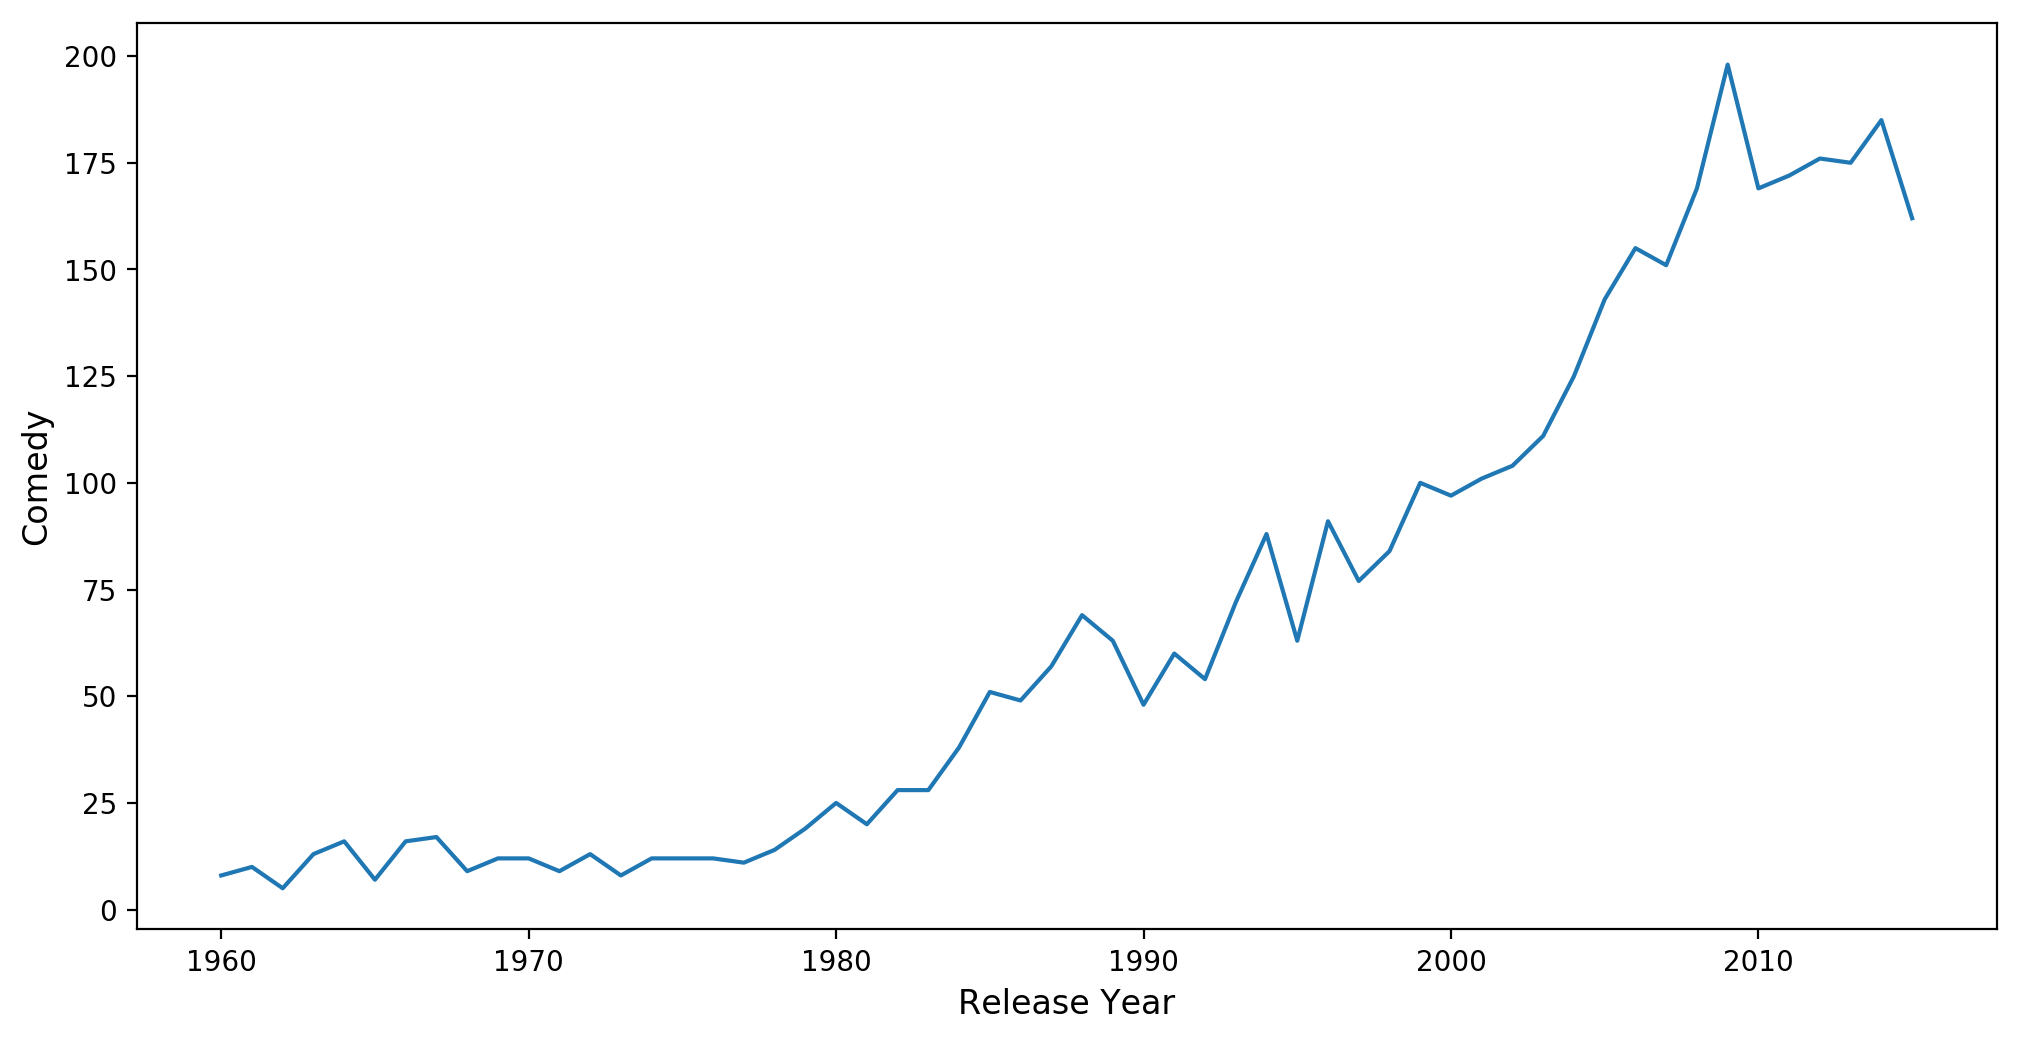

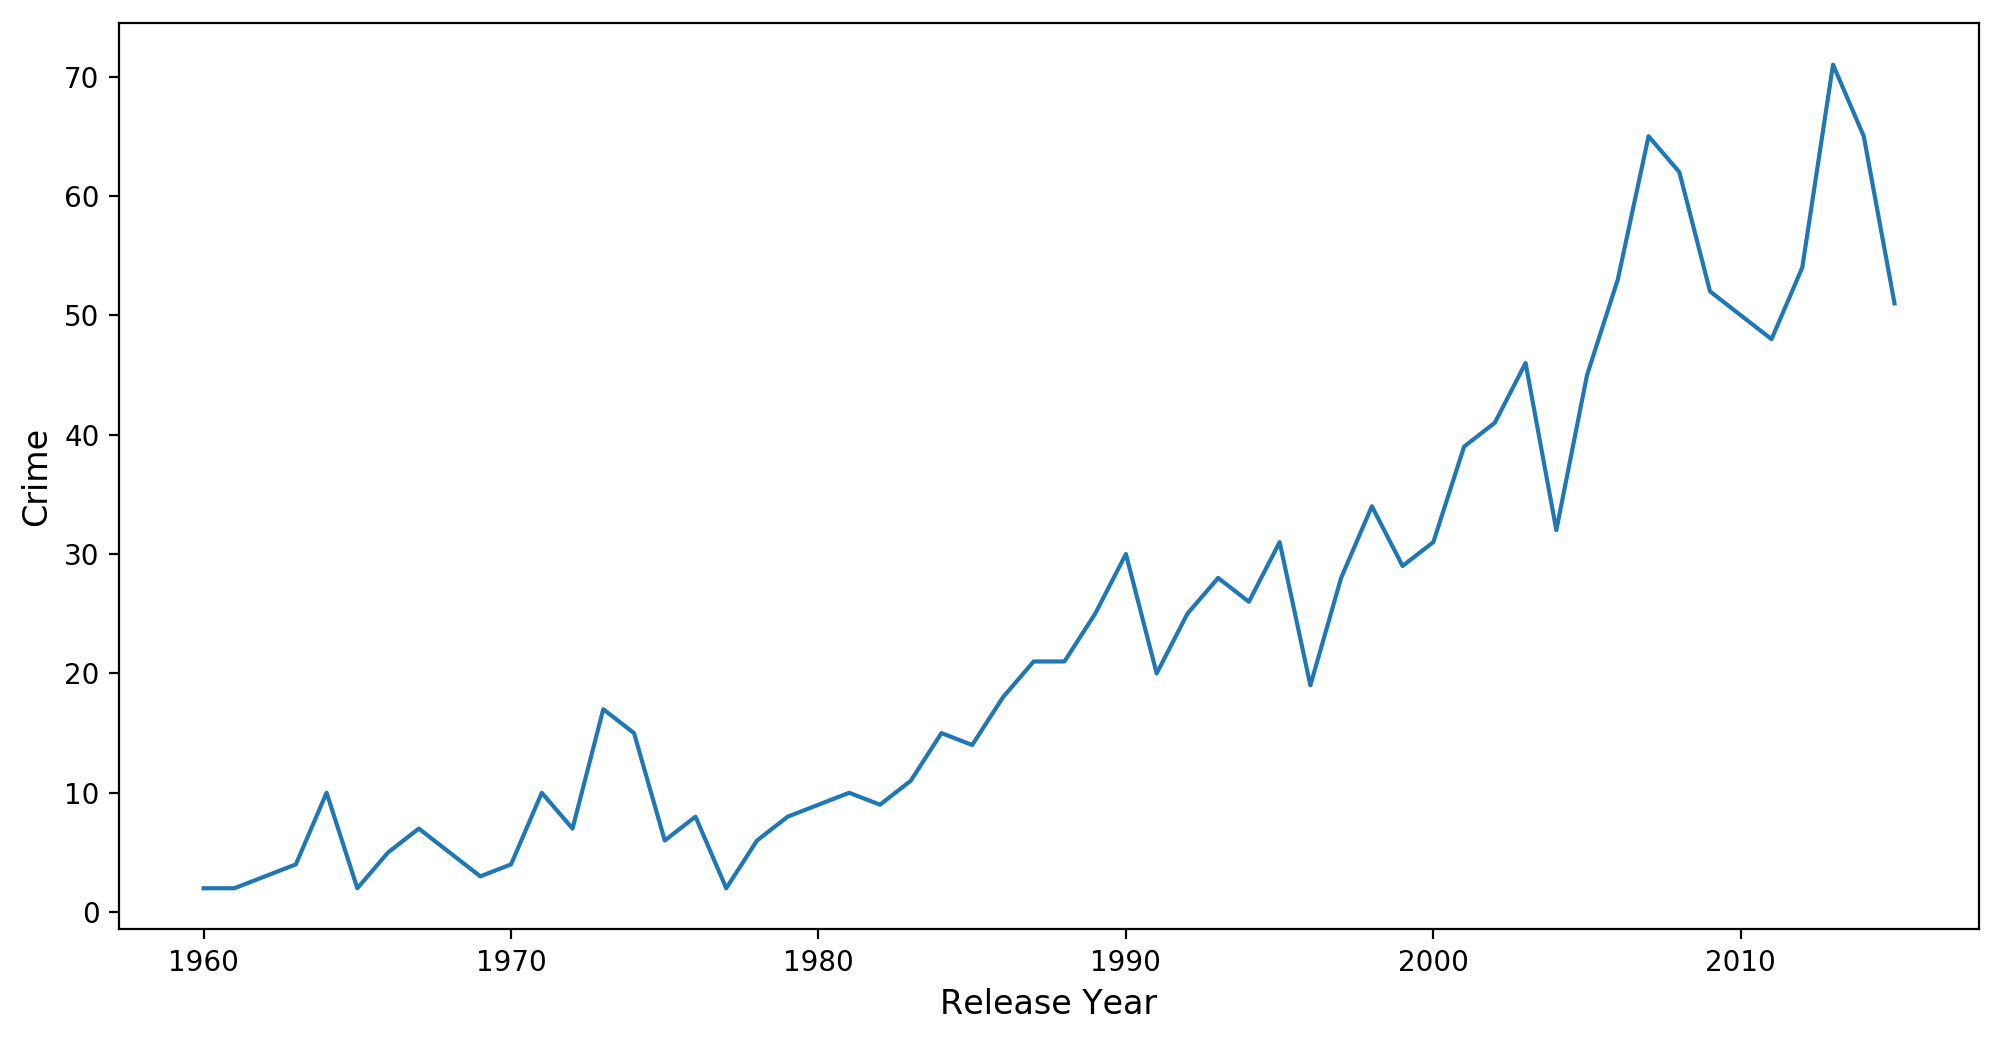

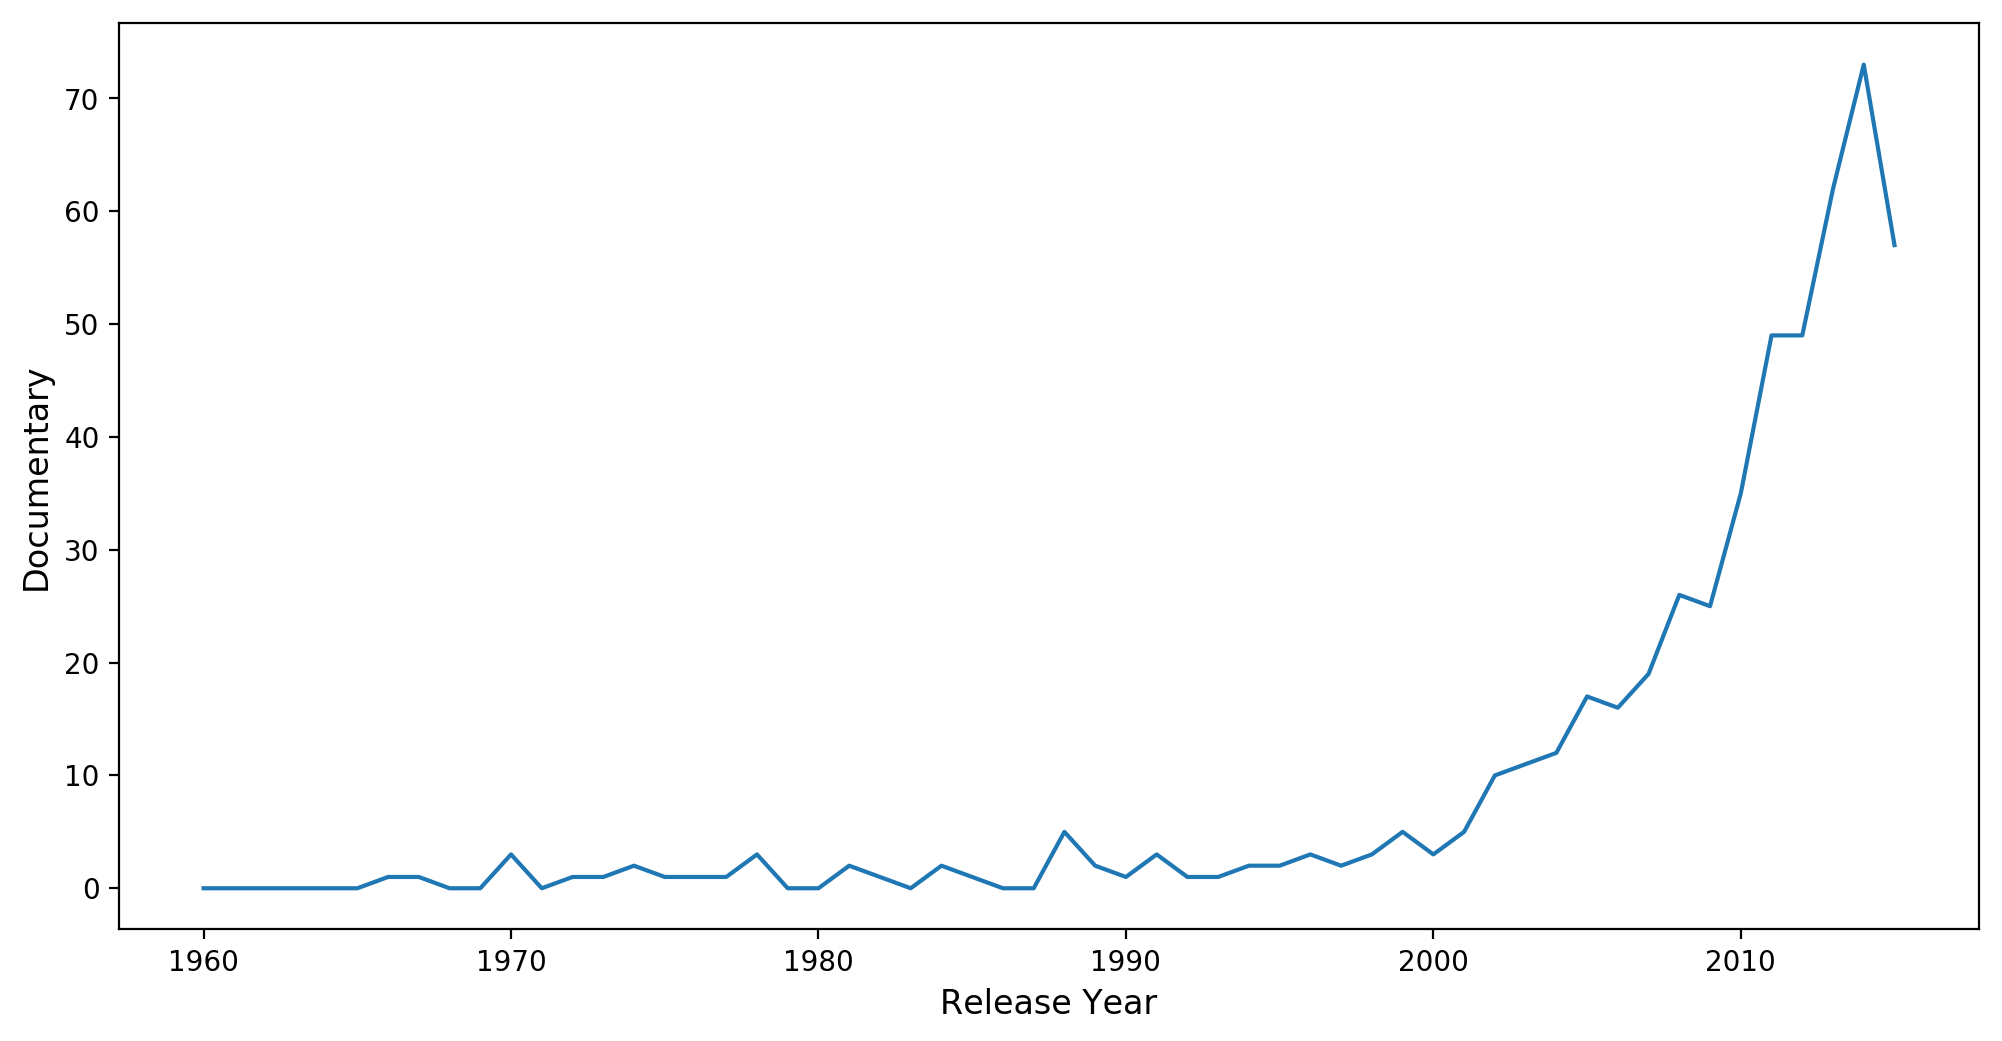

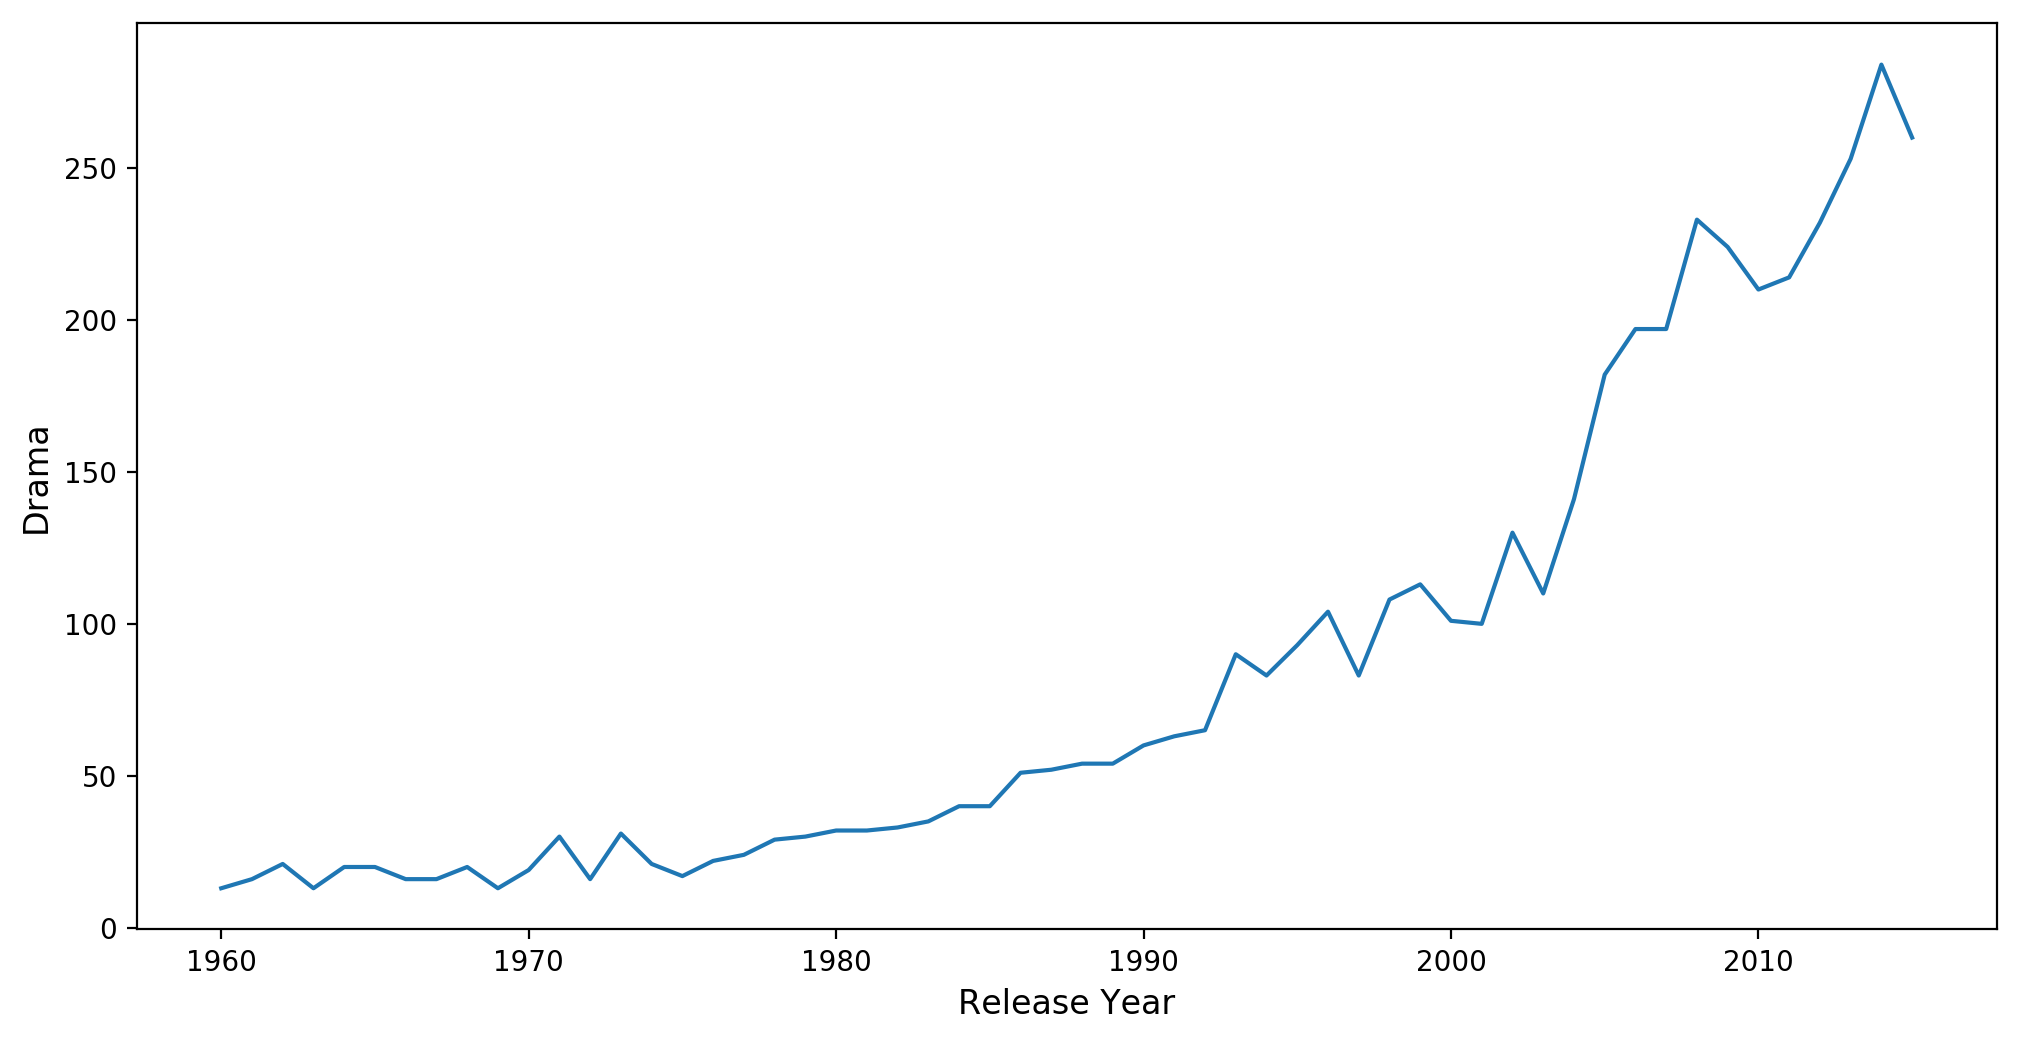

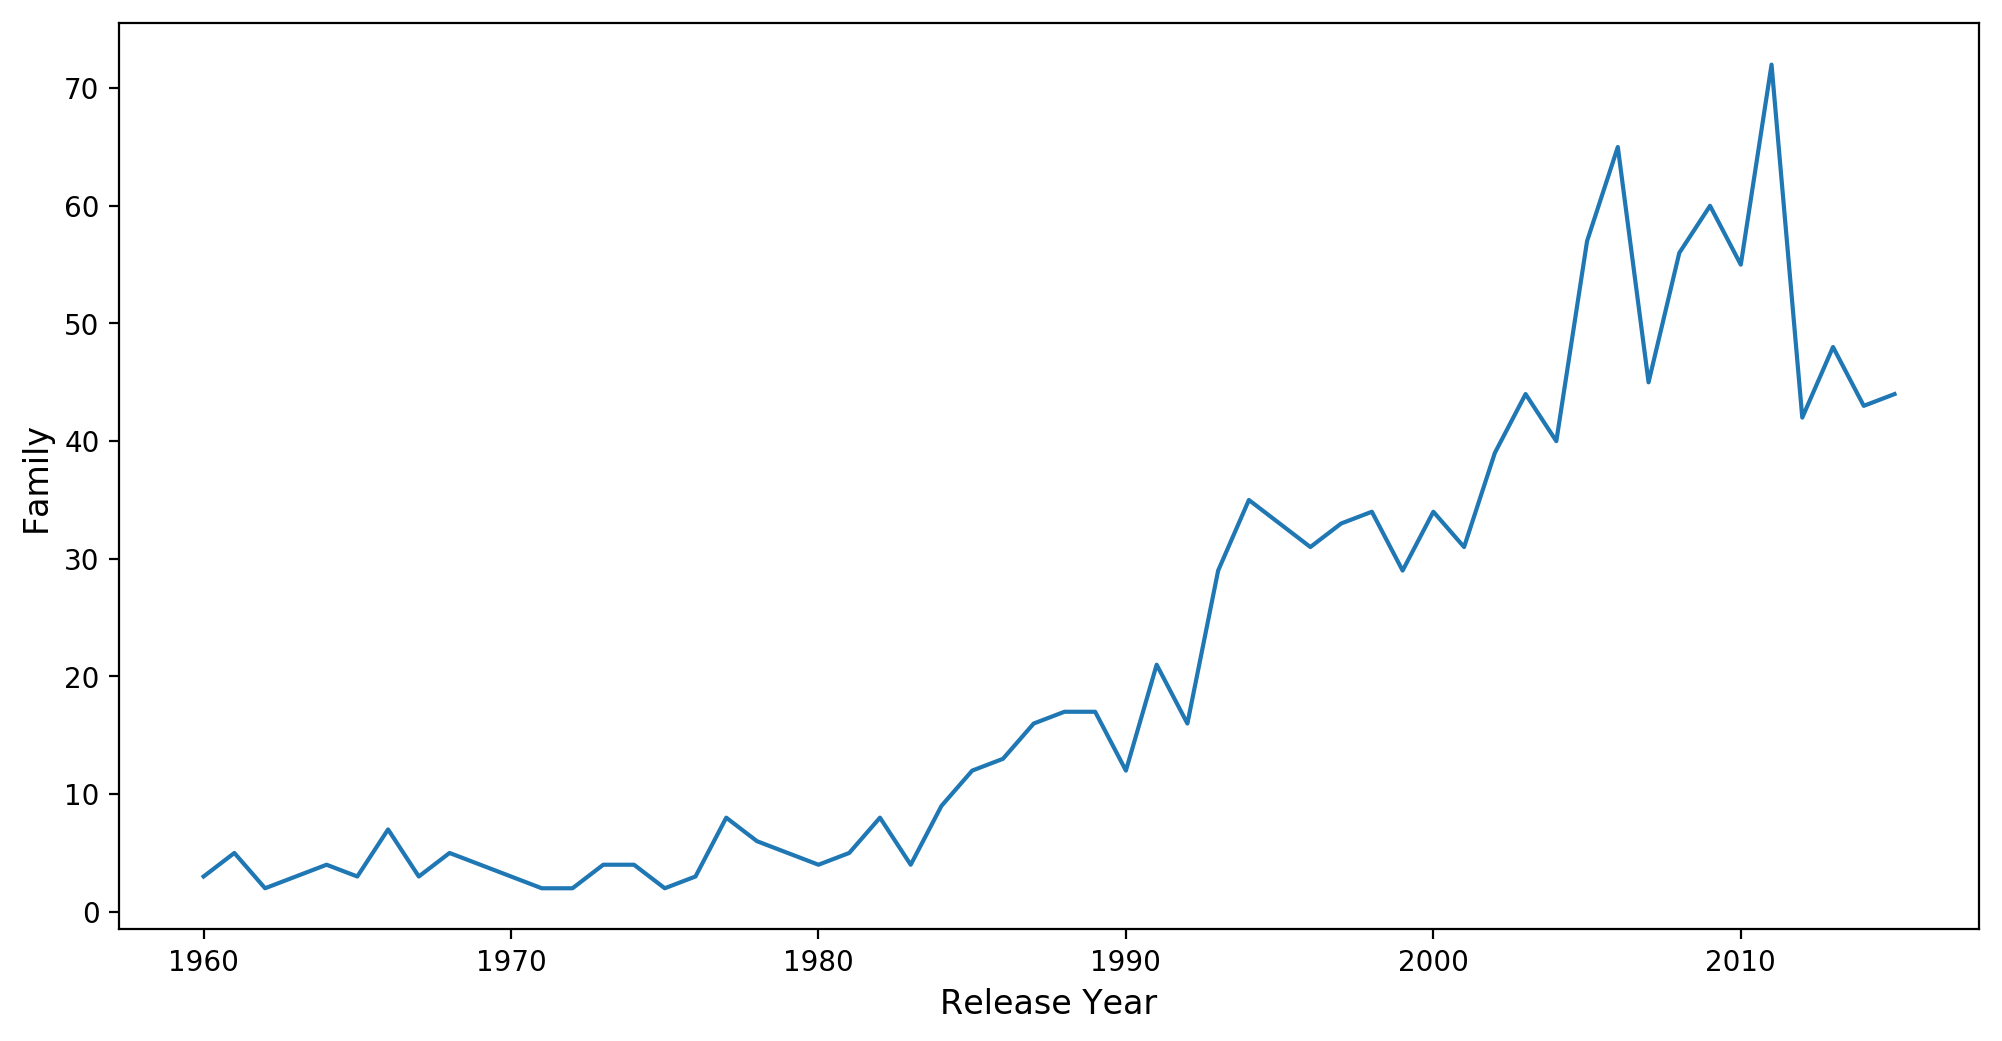

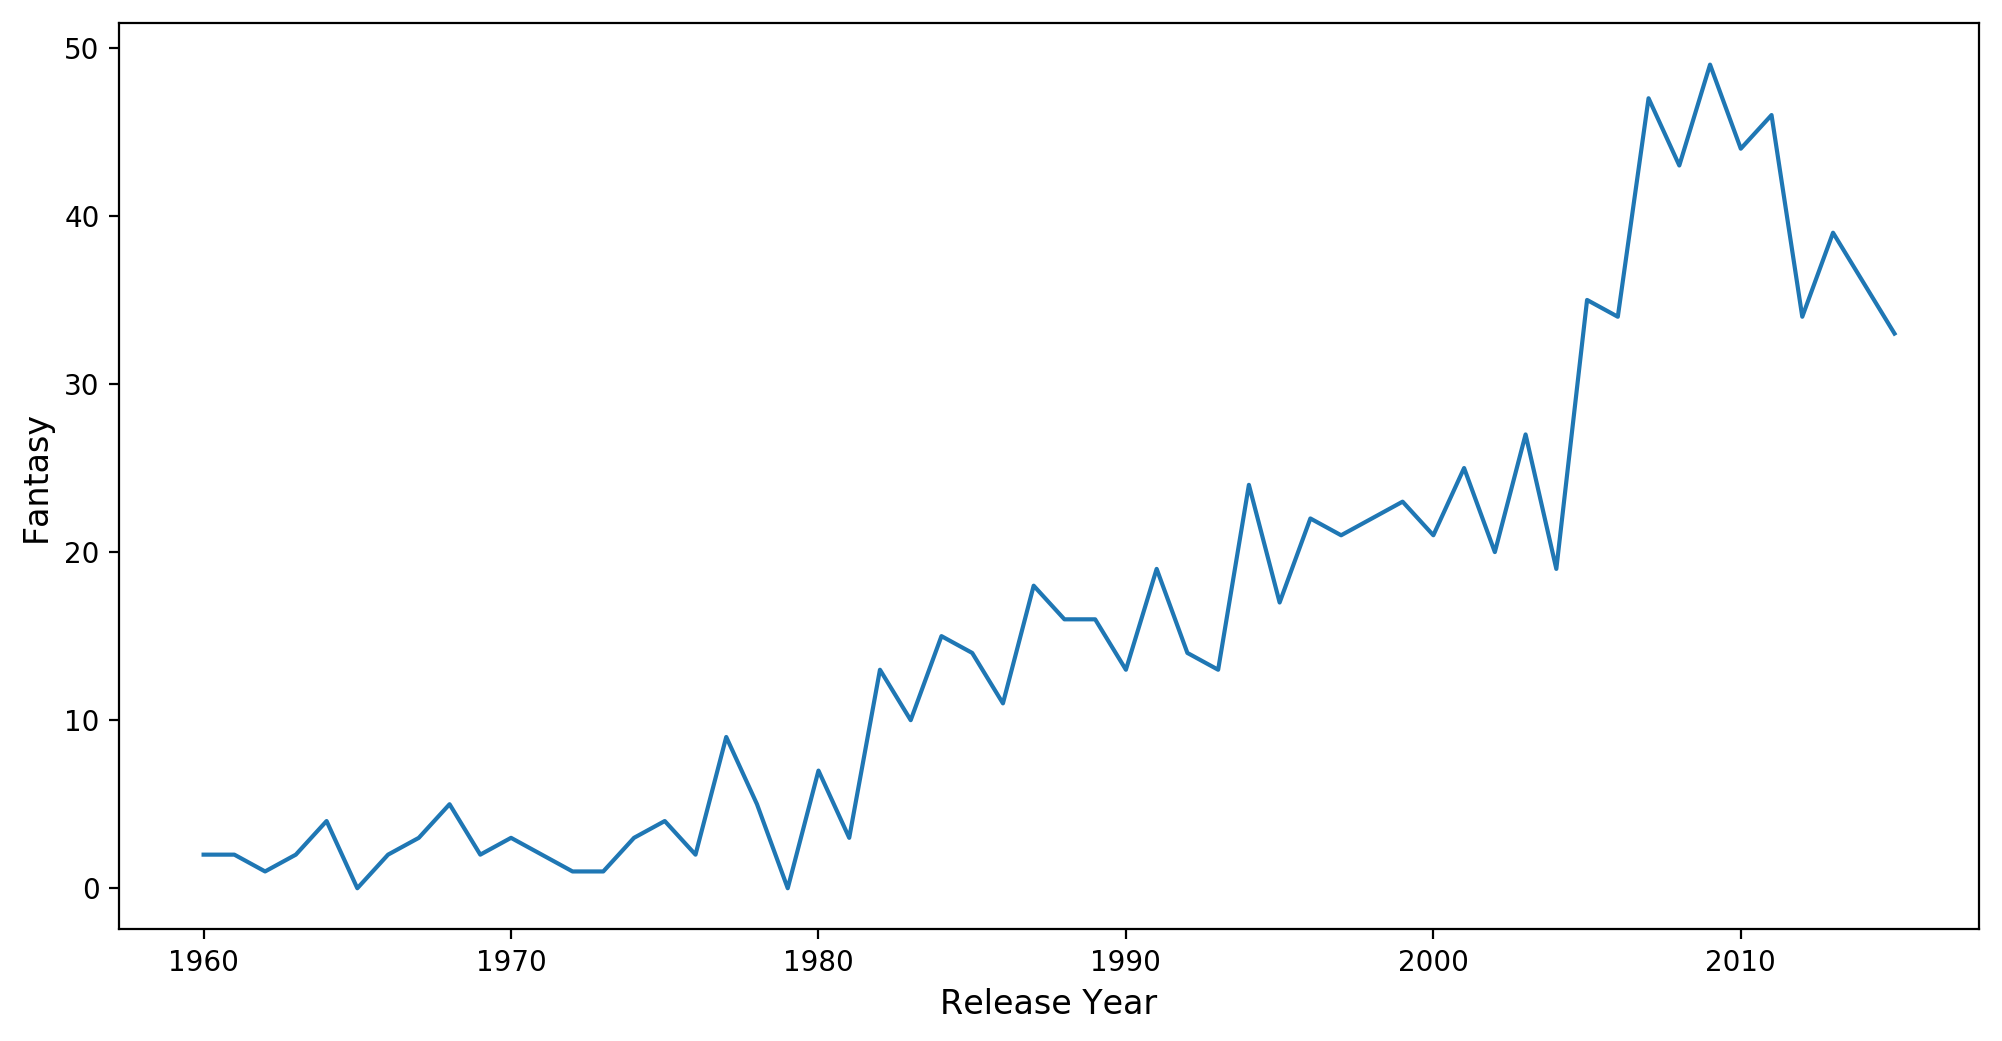

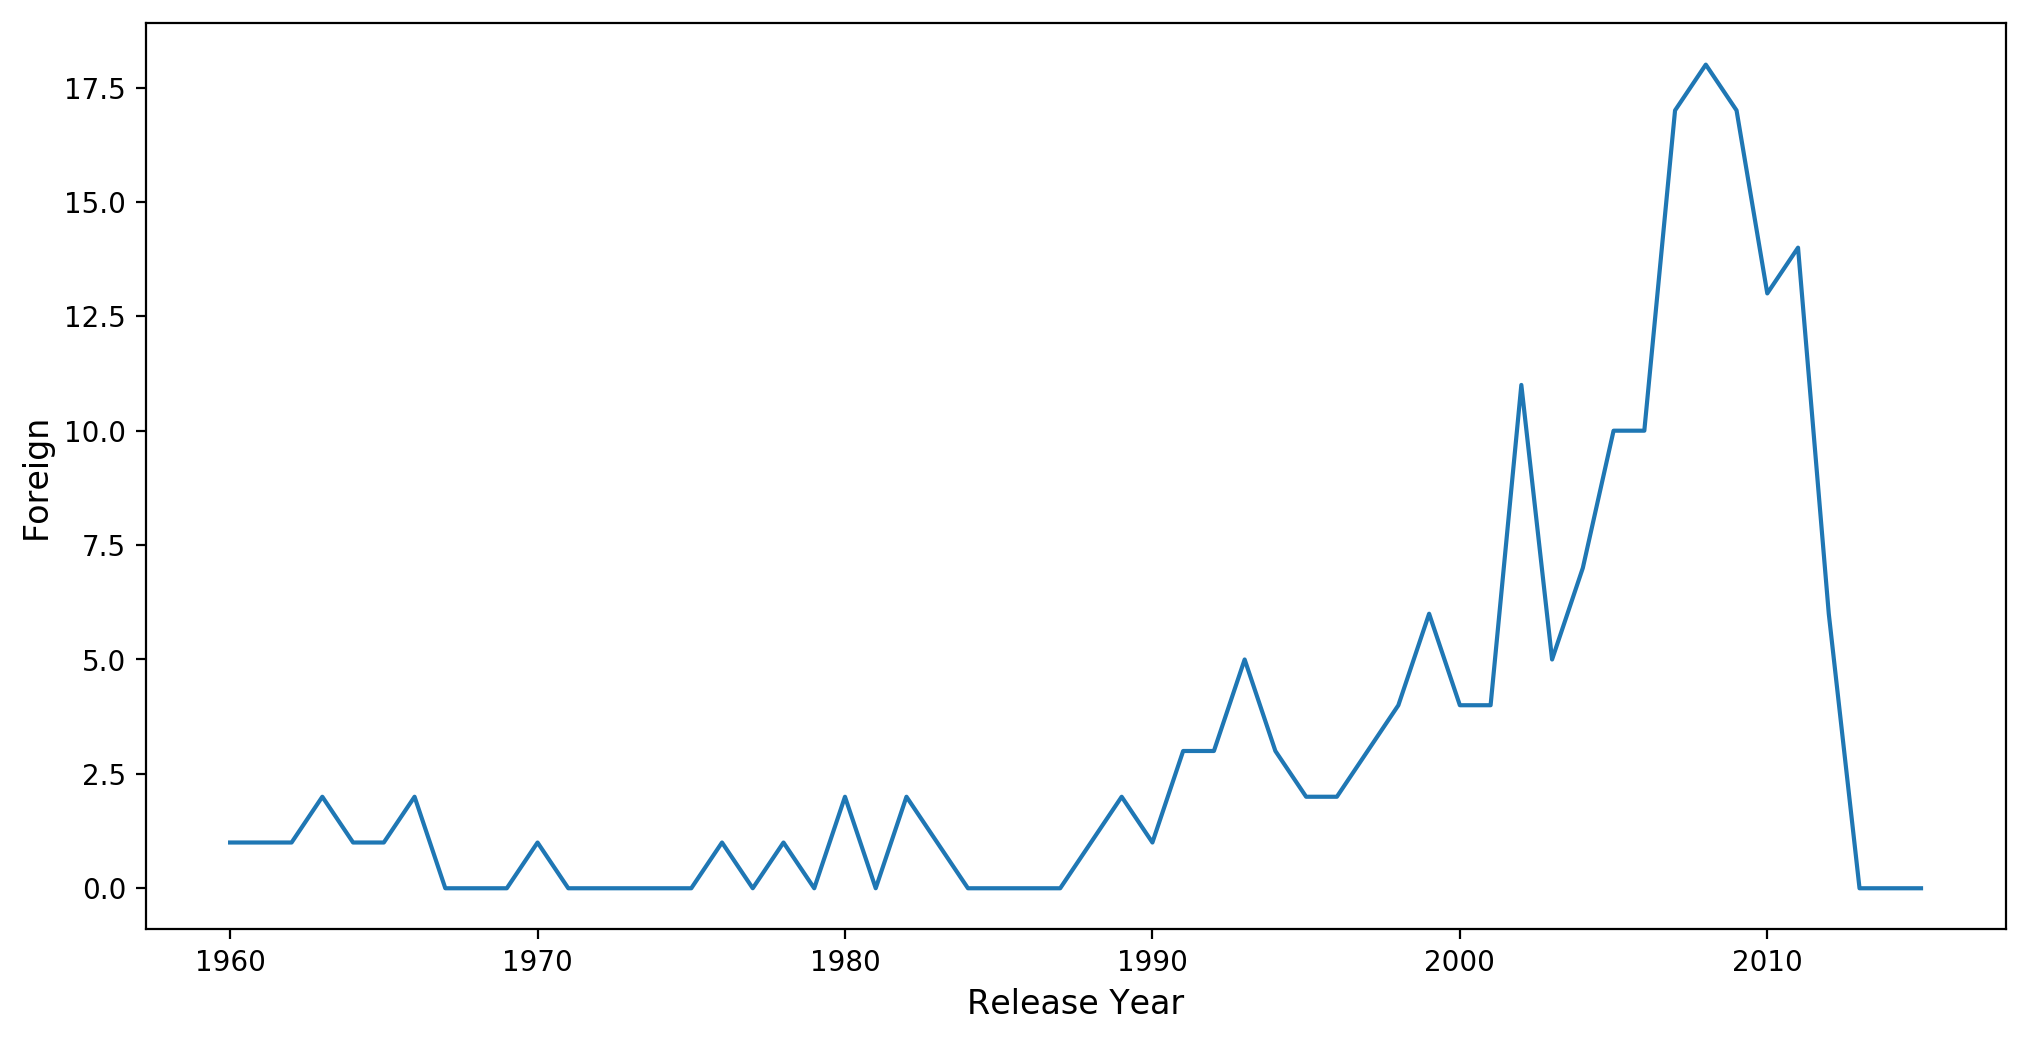

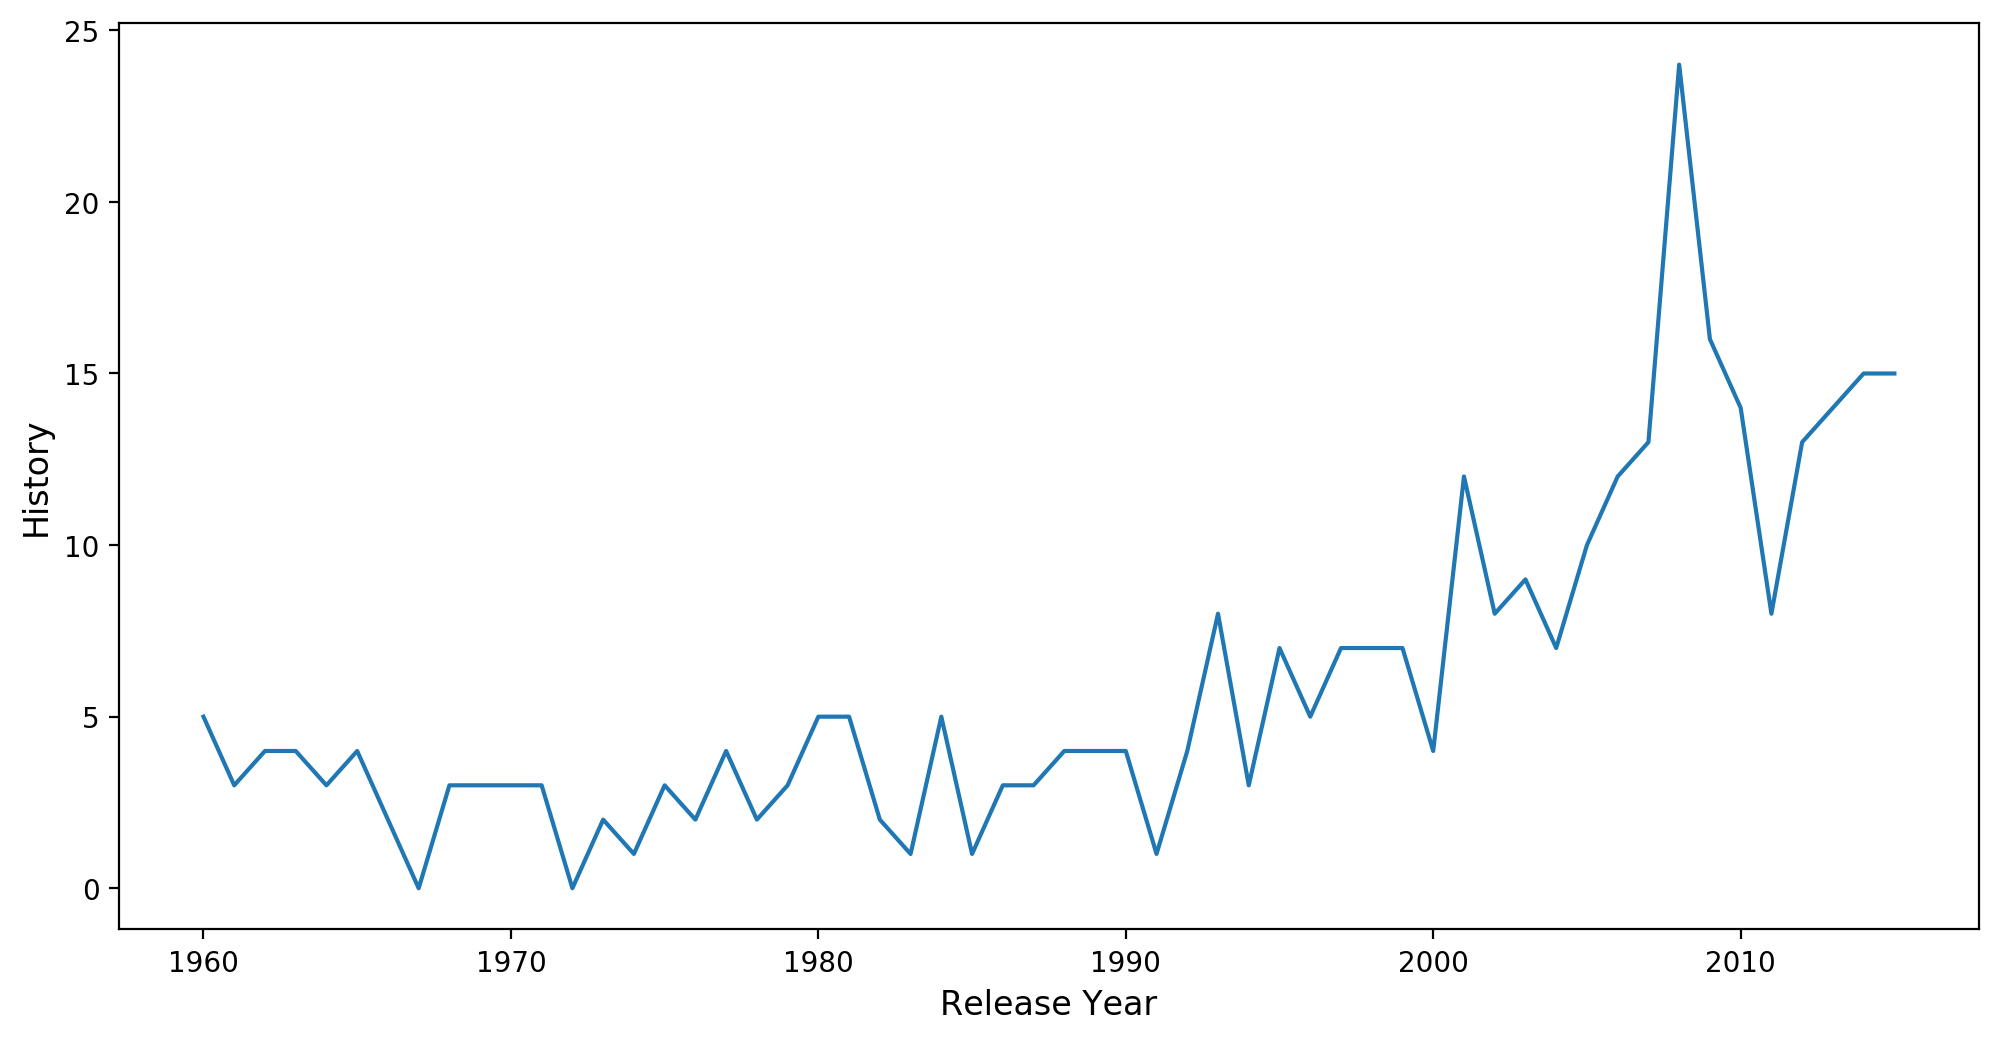

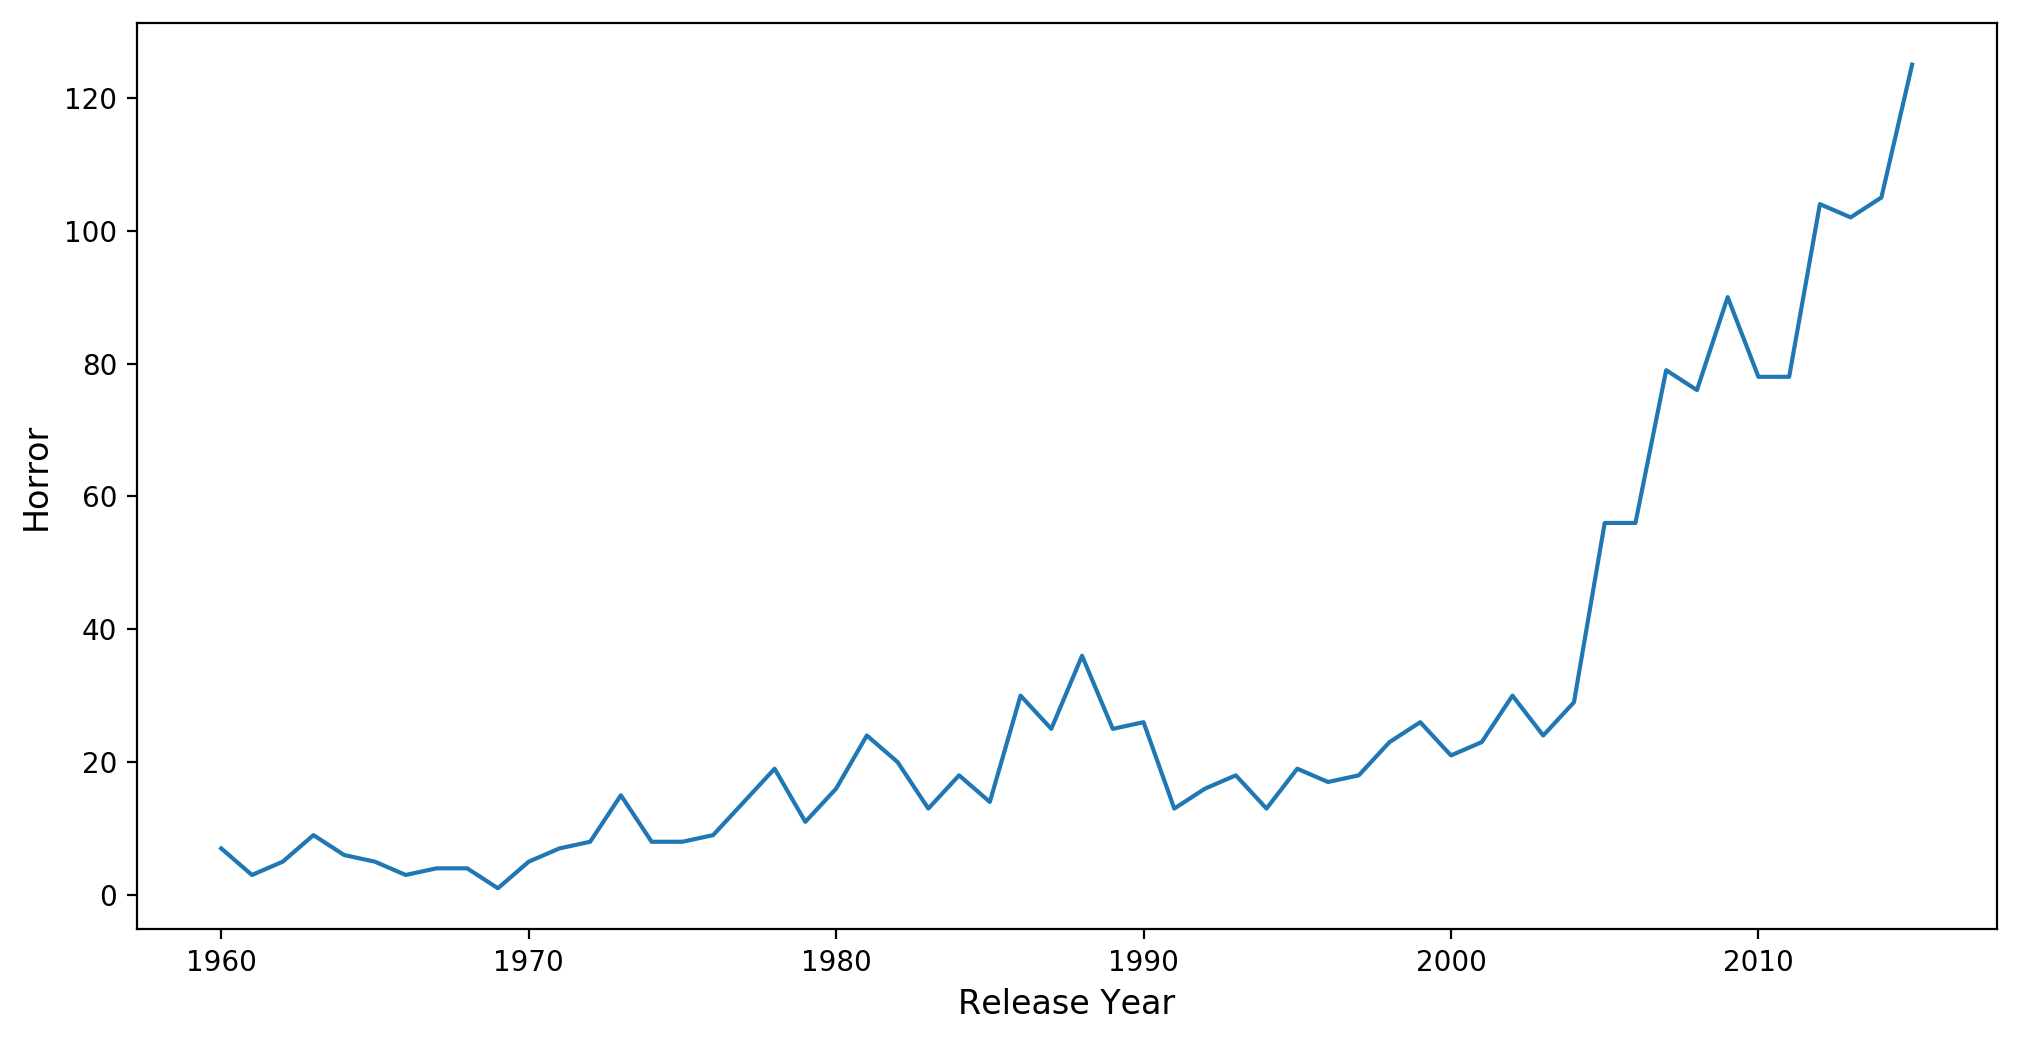

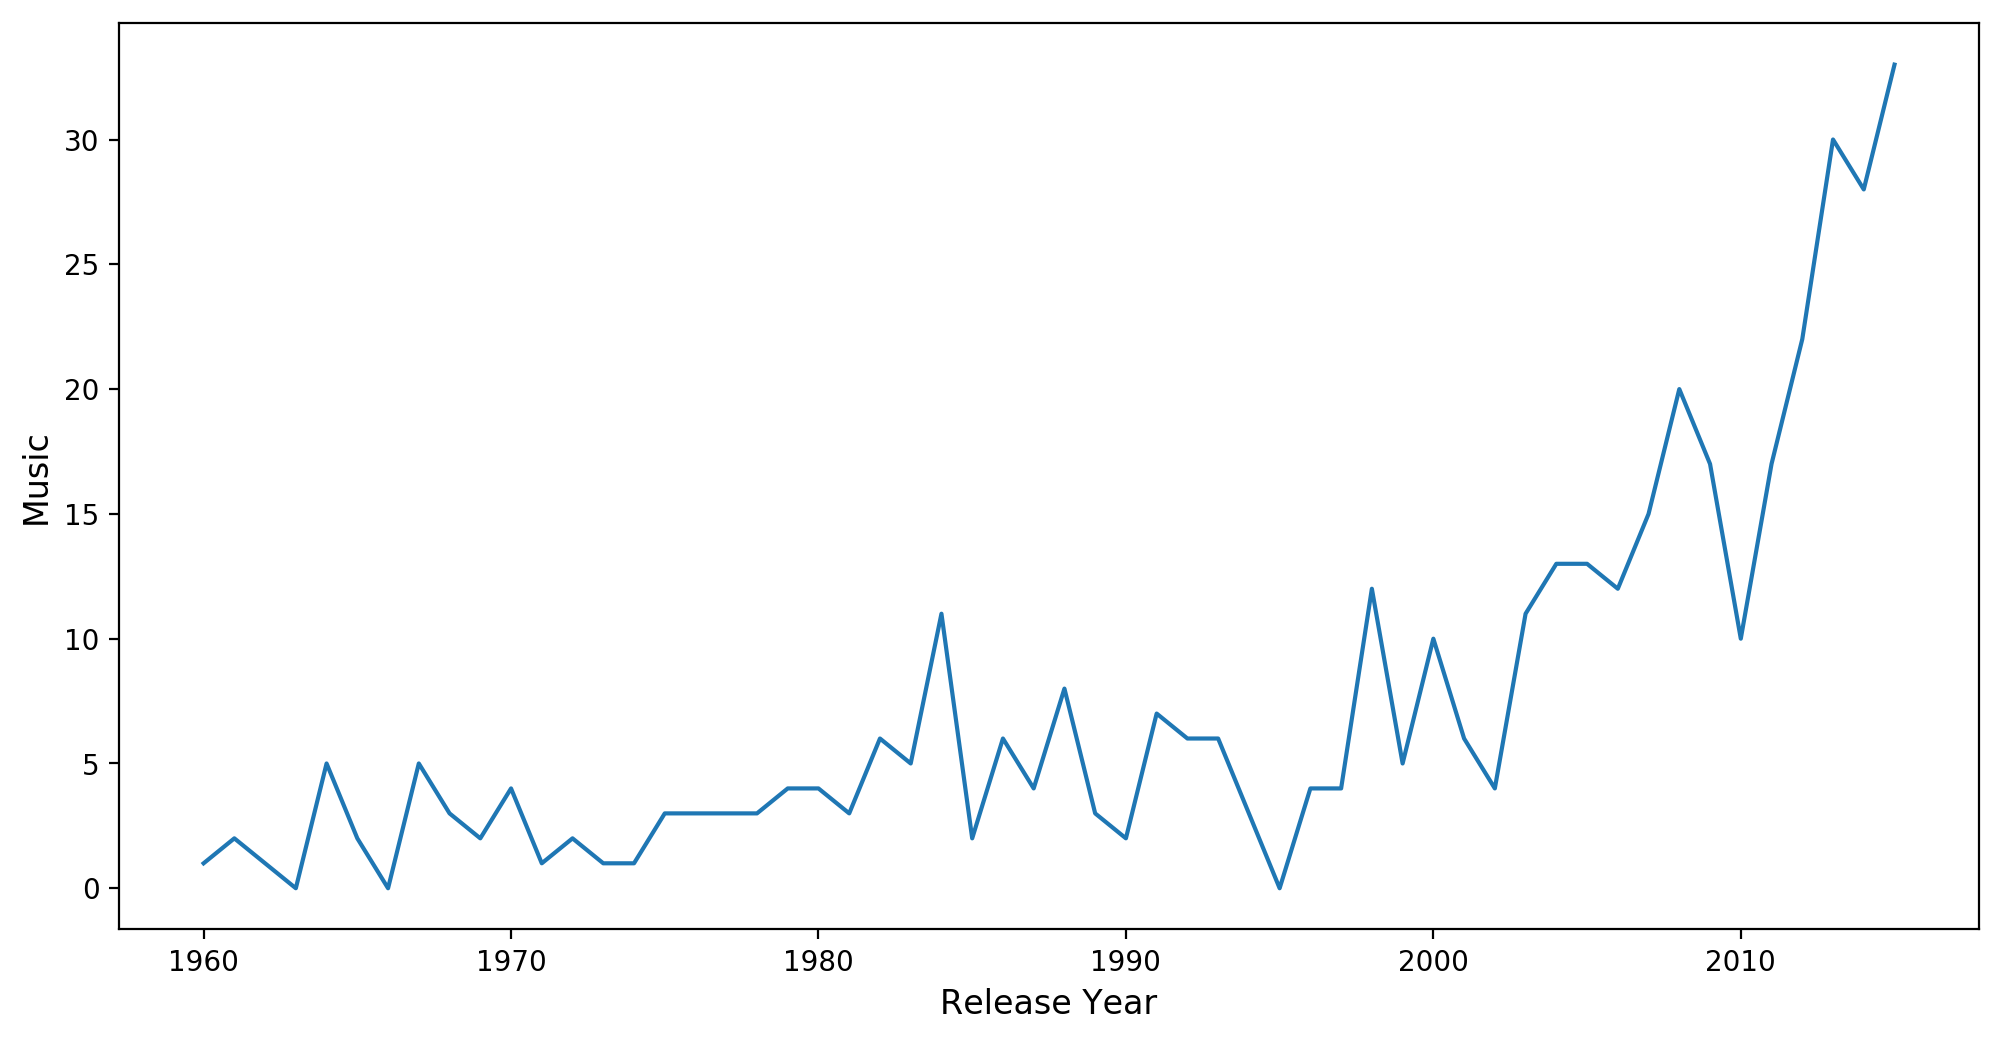

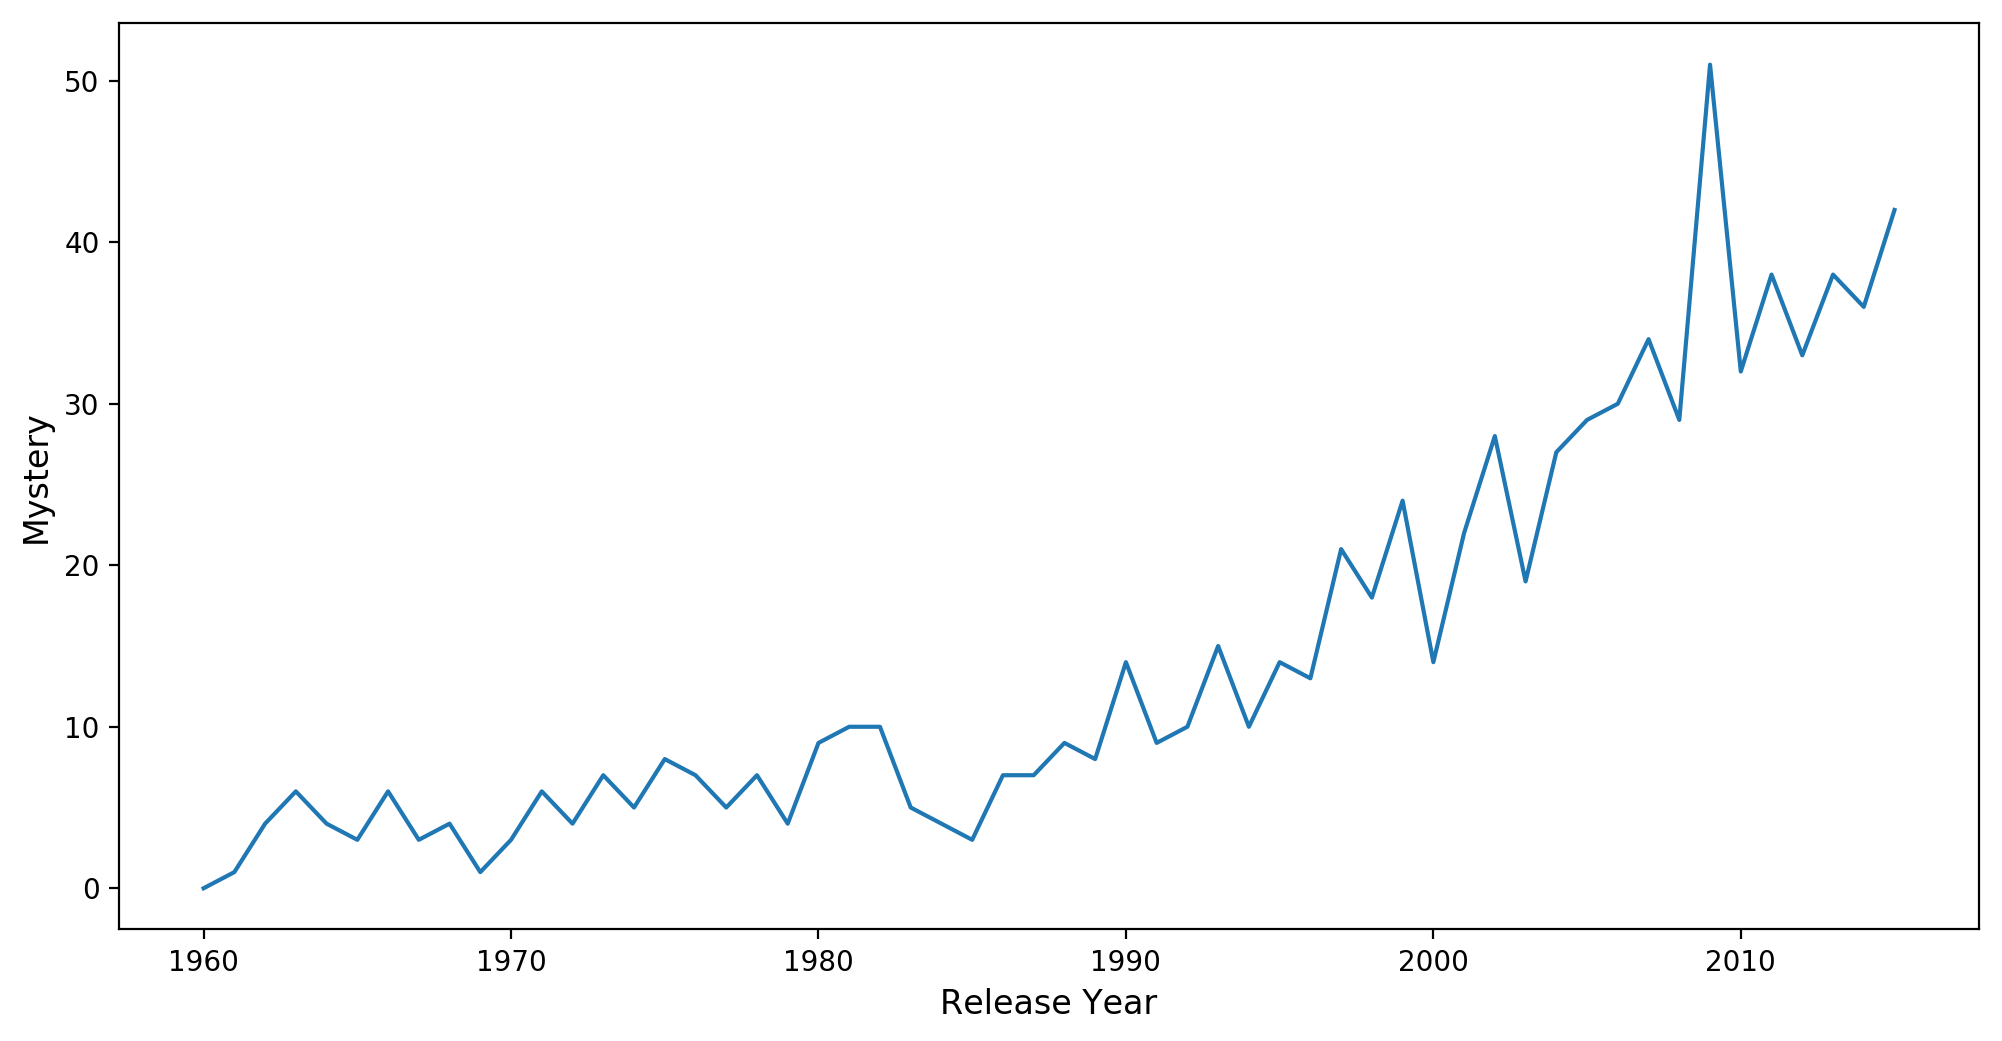

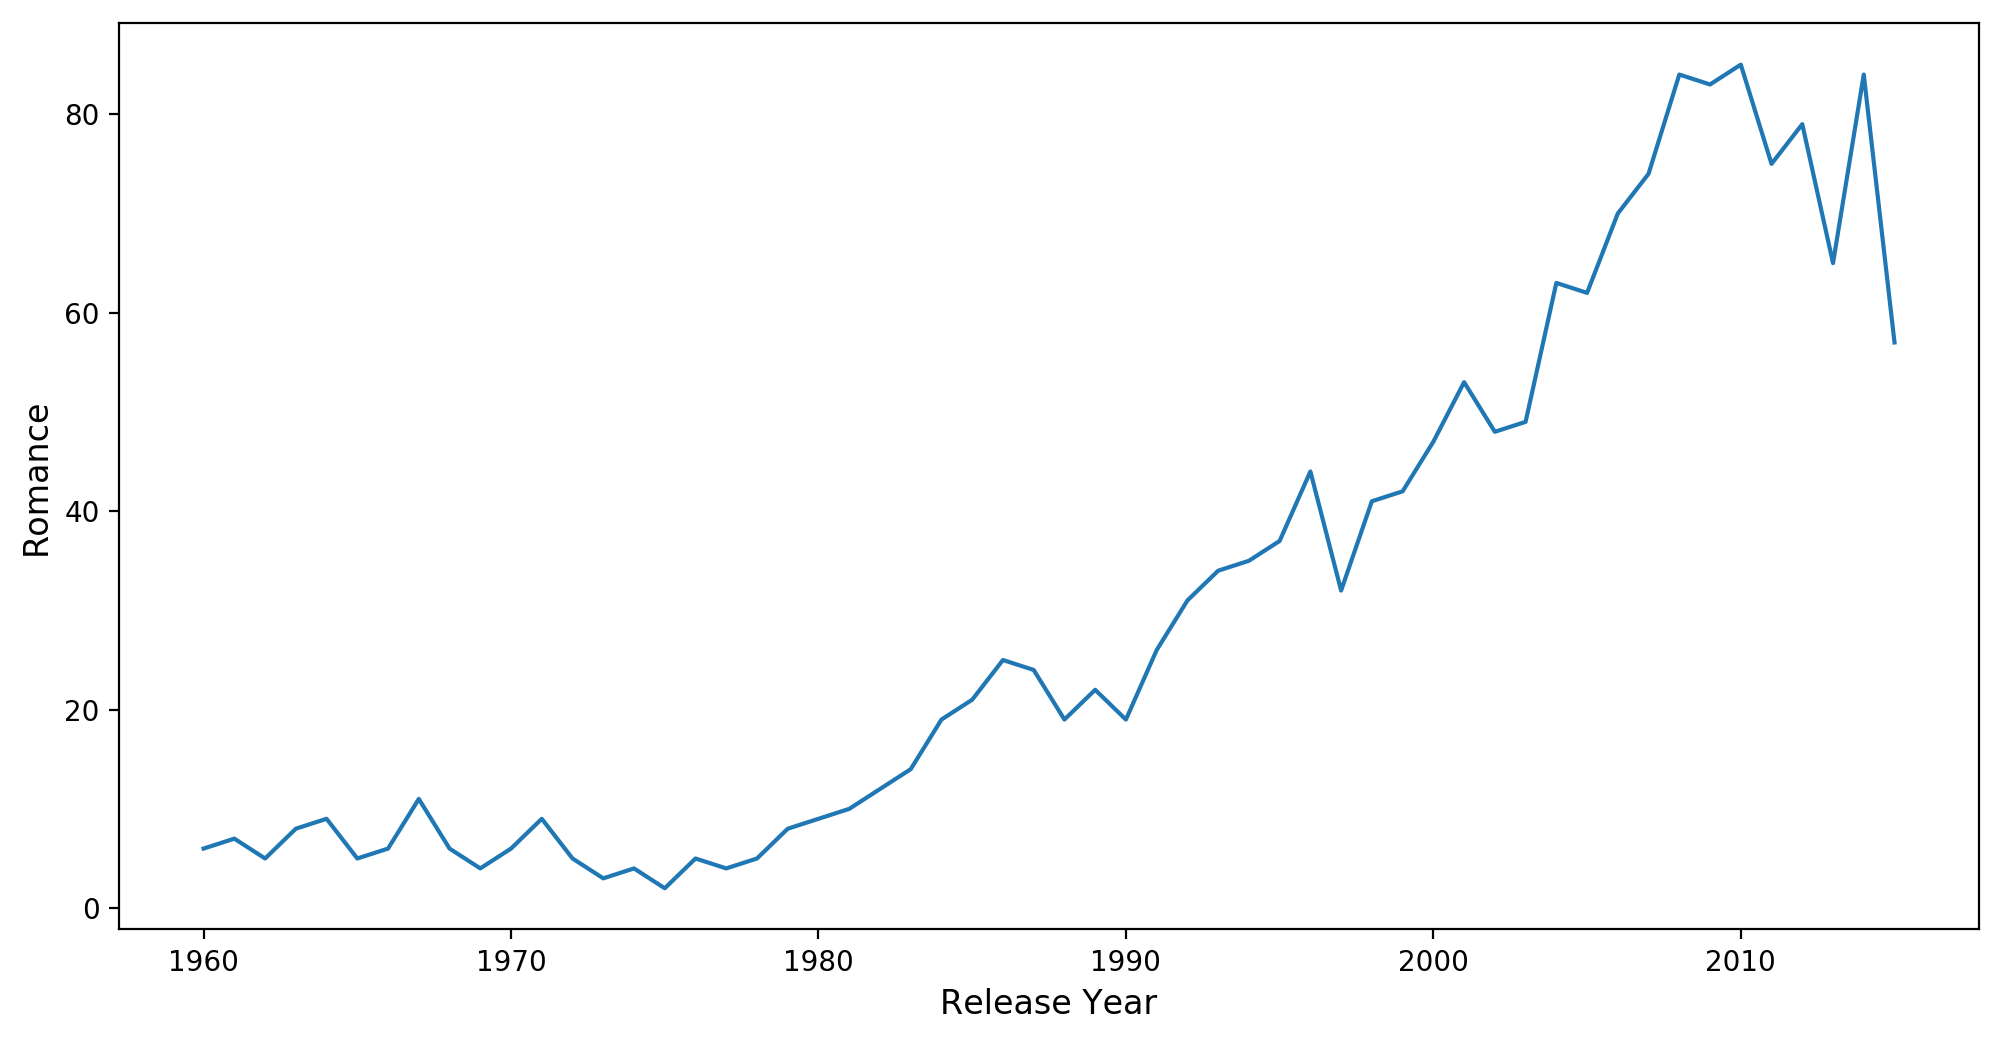

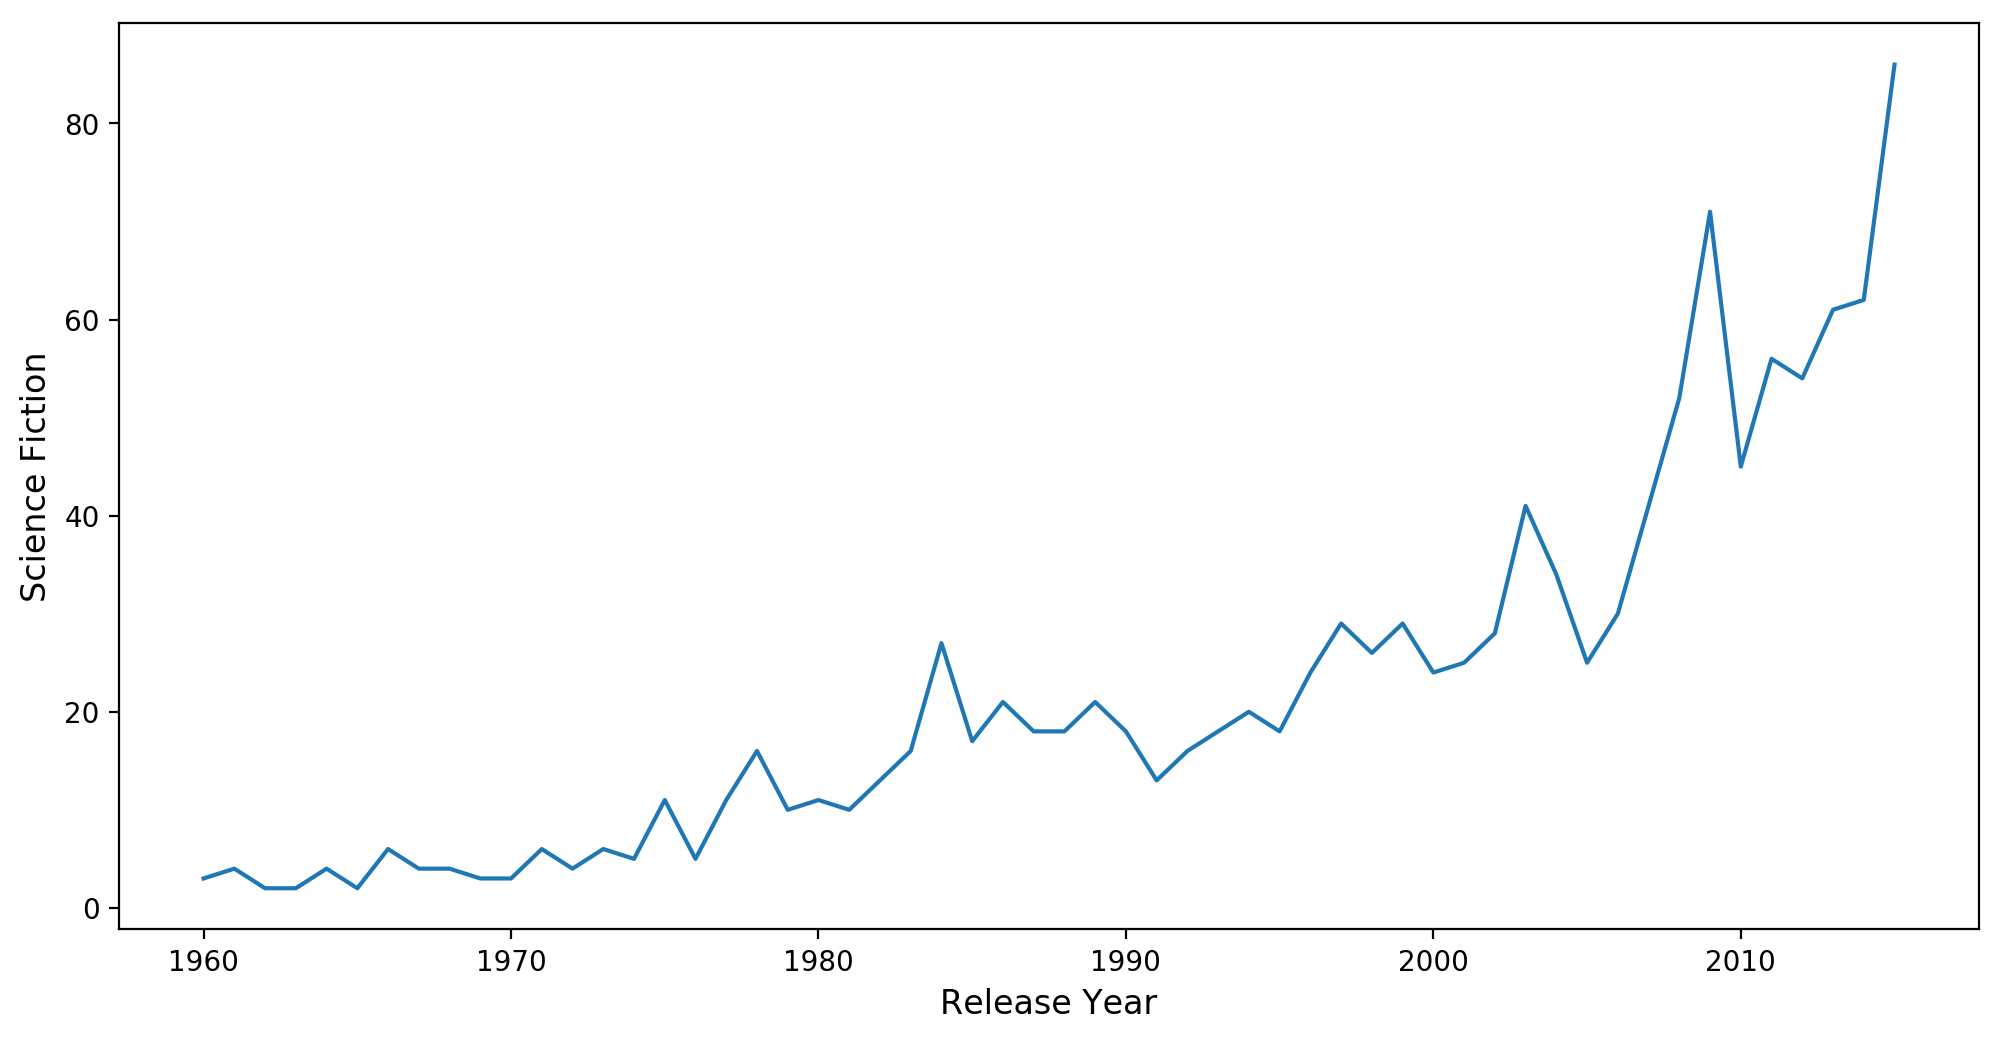

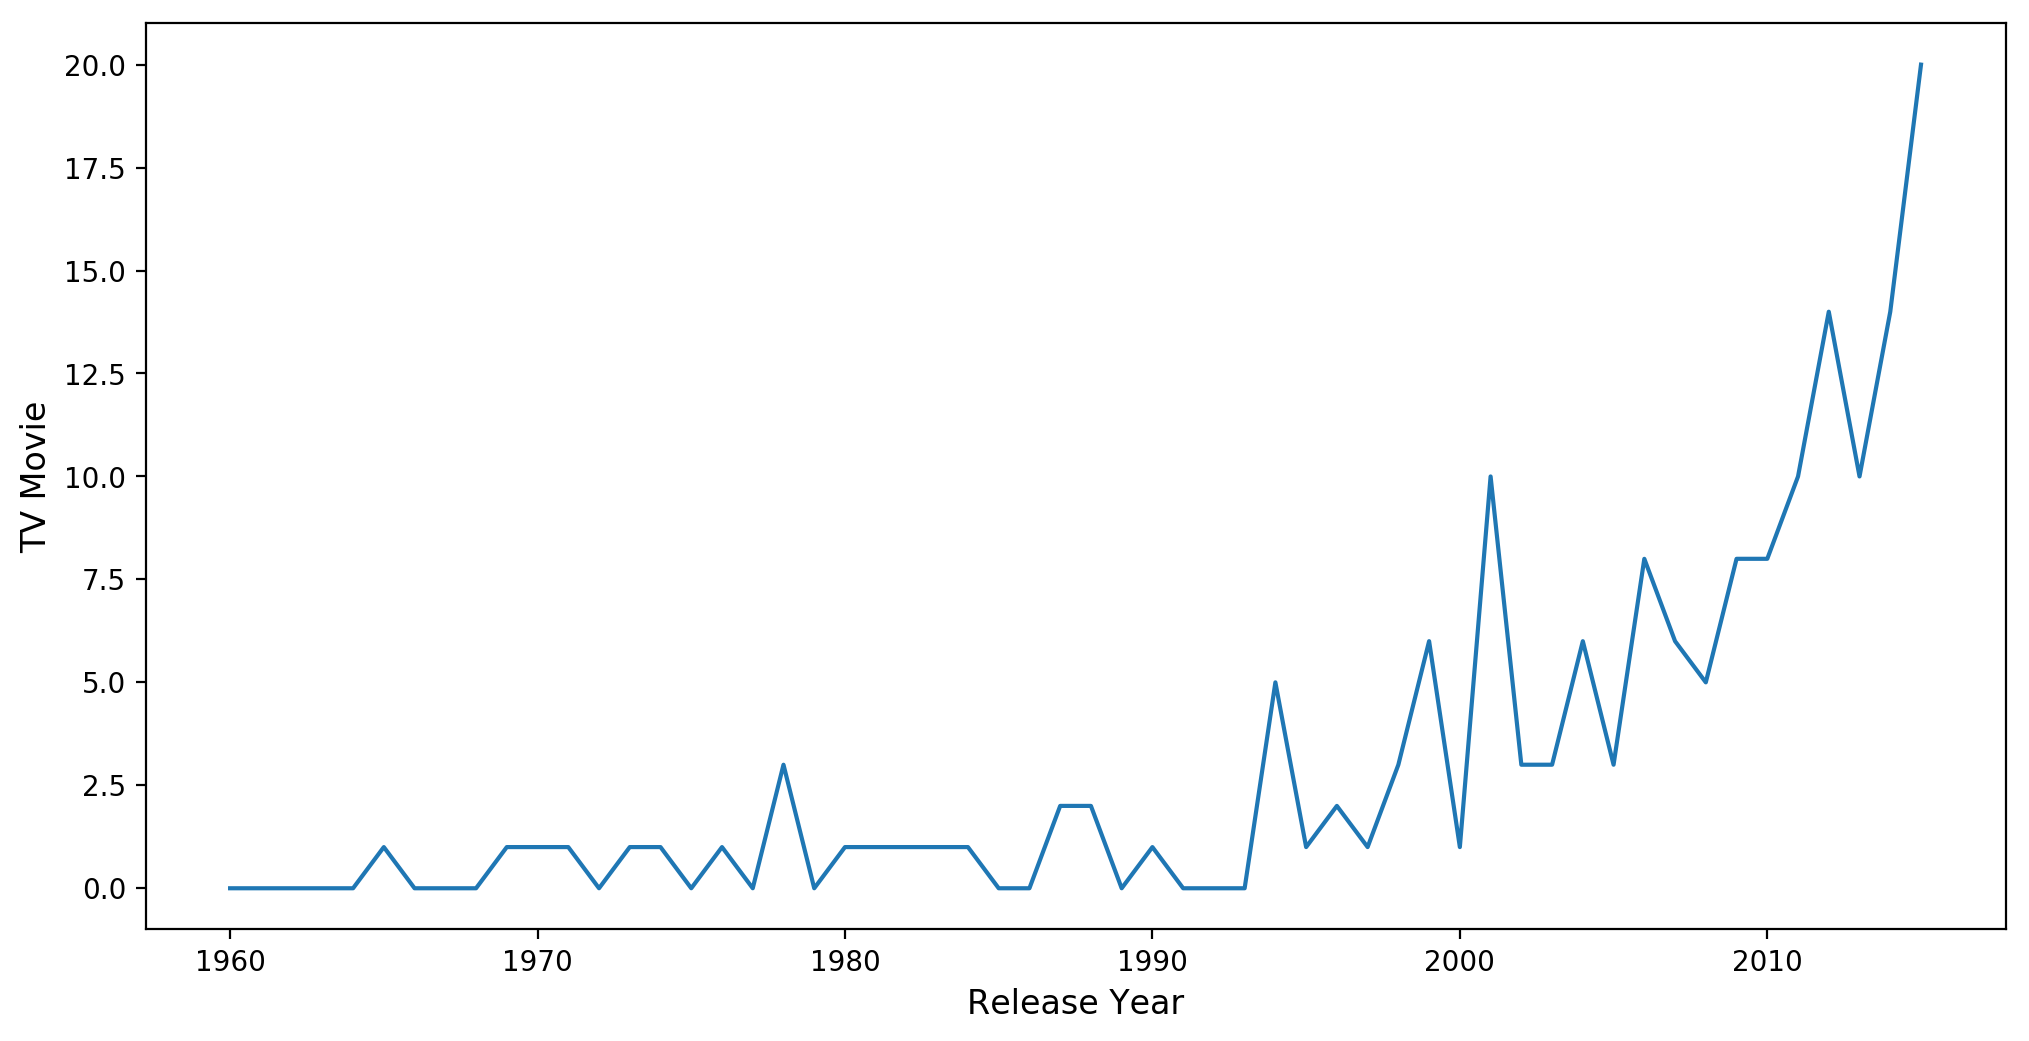

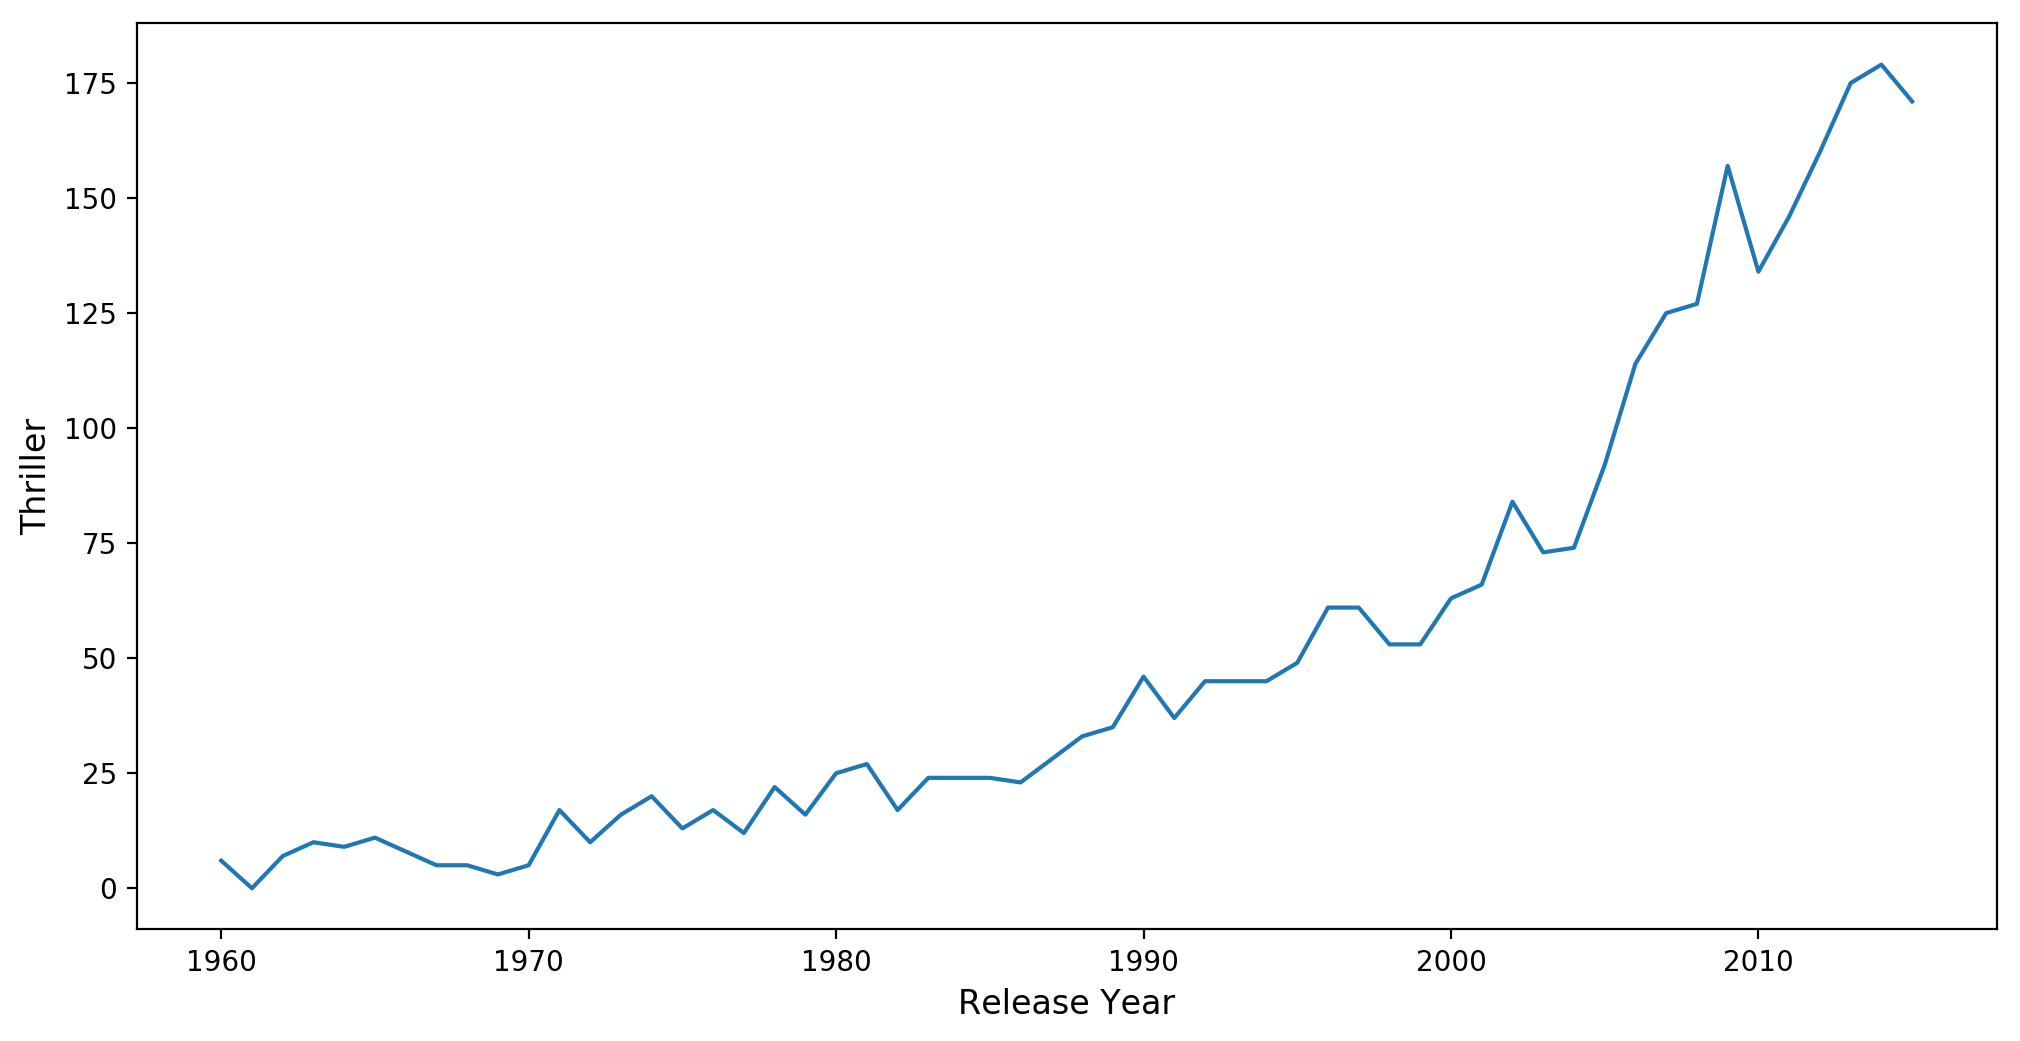

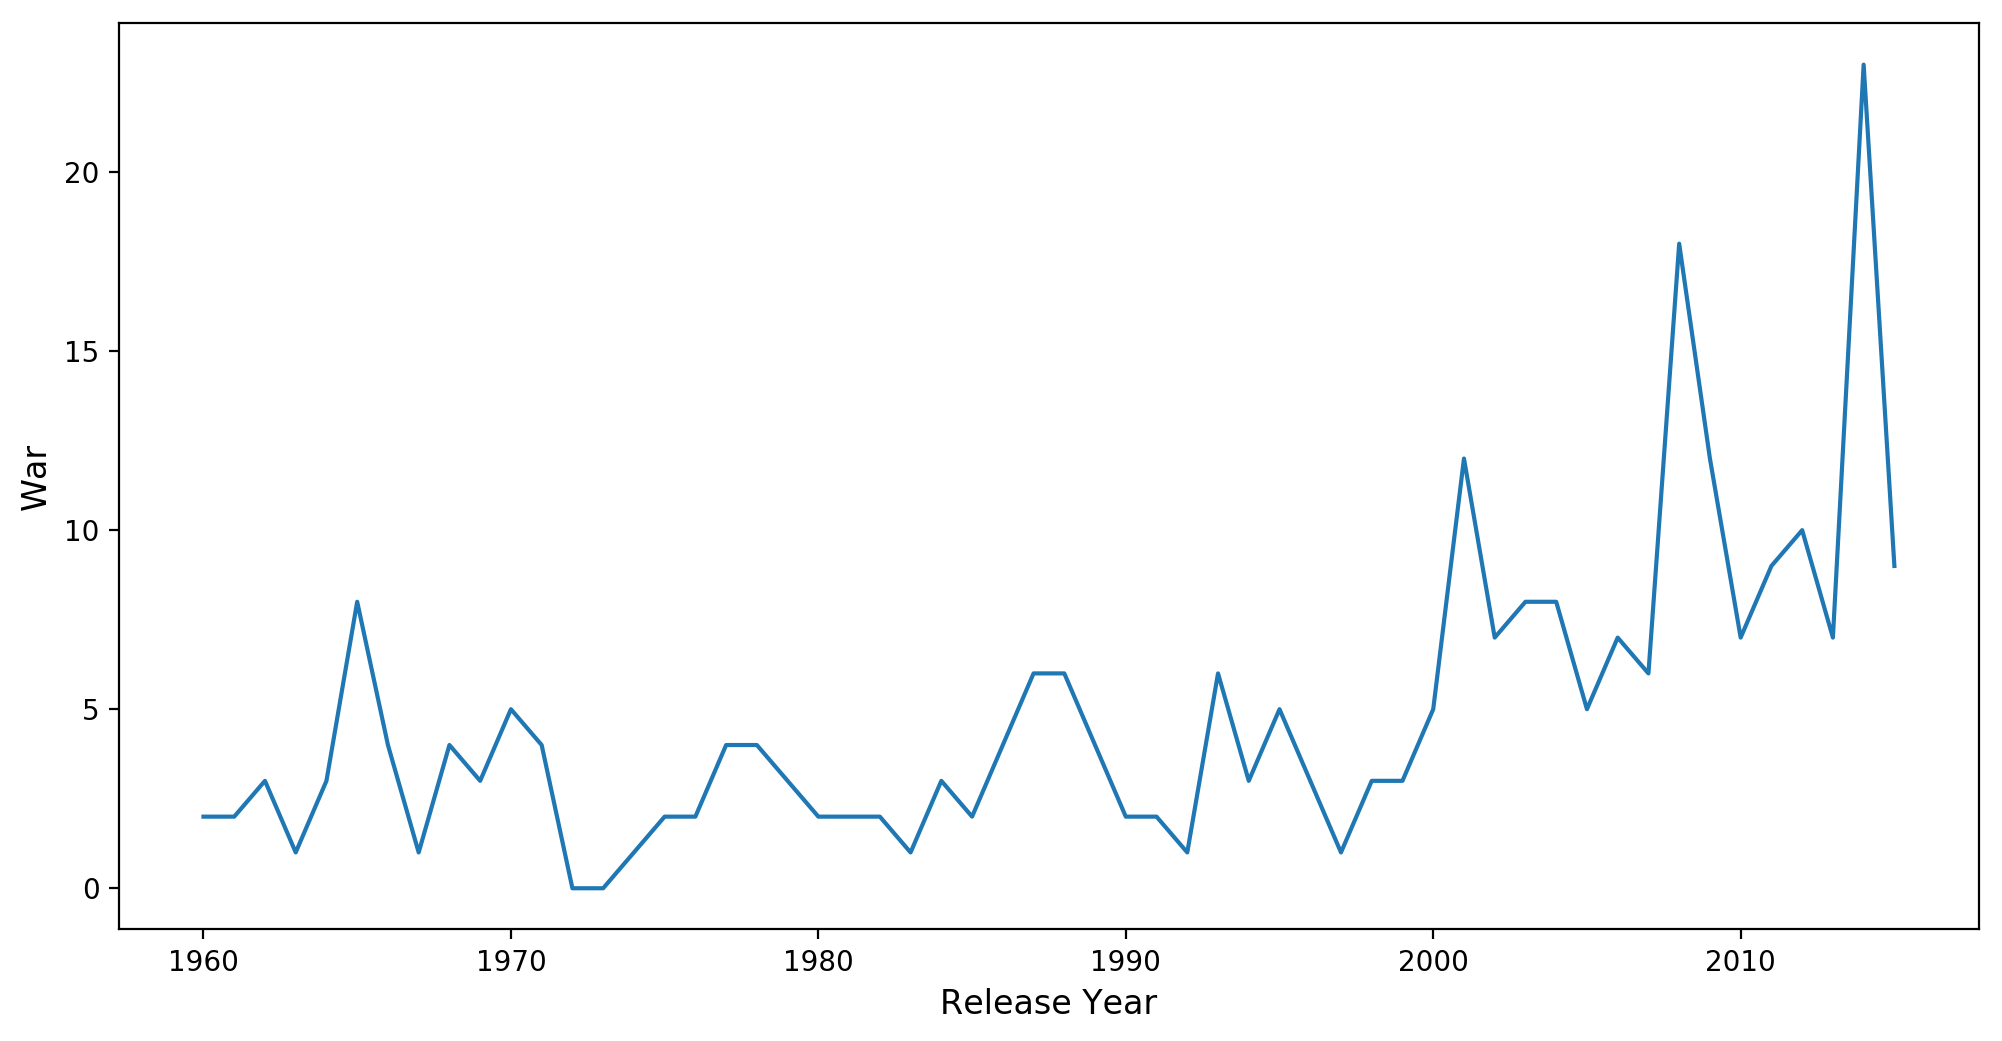

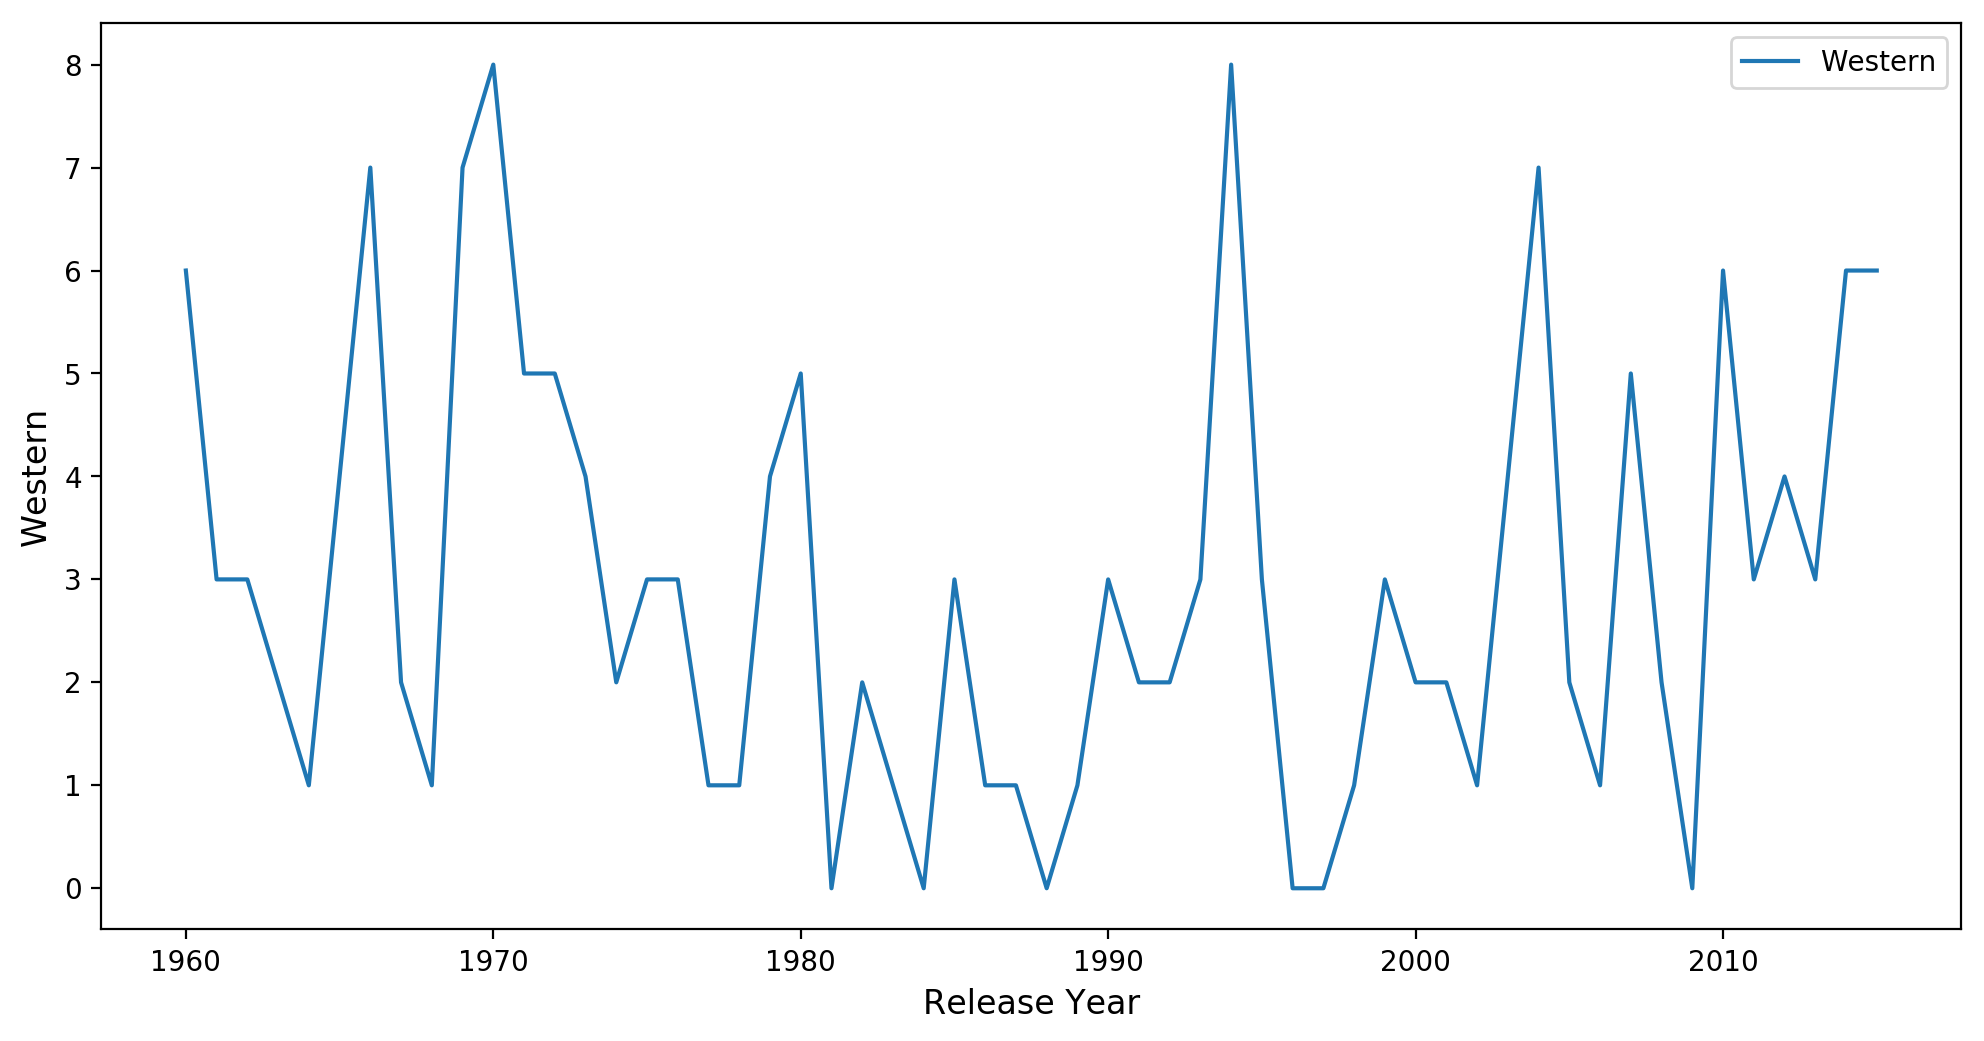

In [23]:
line_plotter(separtor(imdb_df,"genres"))

### As we can see, the 5 genres with the highest production increment rate (arranged Descendingly) are:
    1-Drama
    2-Comedy
    3-Thriller
    4-Action
    5-Adventure

### Now Let's see the total number of movies produced for each genre:

Let's define a function that returns a dataframe with the counts of each movie genre:

In [24]:
def df_counter(dictionary):    
    data_items = dictionary.items()
    data_list = list(data_items)
    df_count = pd.DataFrame(data_list)
    return df_count

In [25]:
df_counter(dictionary_creator(counter("genres")))

,0,1
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


#### 2-Movie Budgets:
    We will use Adjusted Movie Budgets to account for Inflation:

In [26]:
#Create a budget Data frame
budget_df=imdb_df.copy()
budget_df.shape

(10865, 14)

In [27]:
#Pandas series grouped by release years and summing the adjusted budget for each year
budget=budget_df.groupby("release_year")["budget_adj"].sum()

In [28]:
#recreating the data frame with the release year and summed budgets for every year to plot the budget's behaviour
budget_df=df_counter(dictionary_creator(budget))

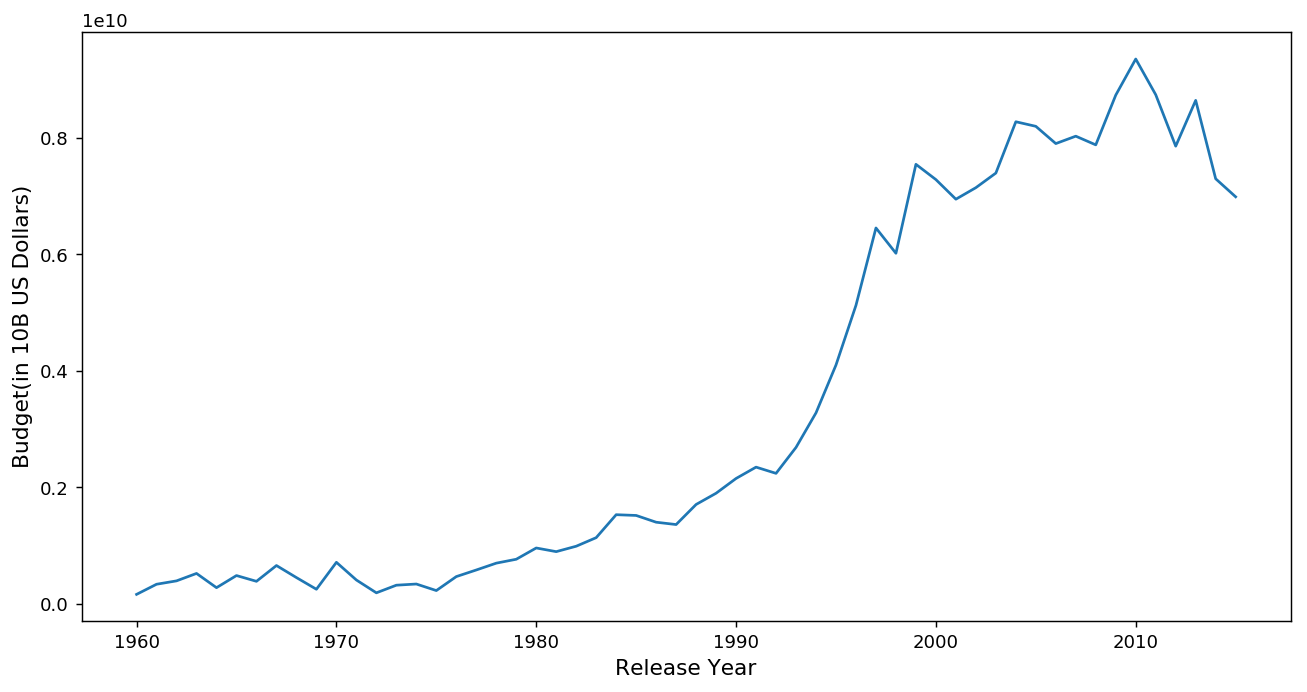

In [29]:
plt.figure(figsize=(12,6), dpi = 130)
plt.plot(budget)
plt.xlabel("Release Year", fontsize = 12)
plt.ylabel("Budget(in 10B US Dollars)", fontsize = 12);

As we can see movie budgets are growing rapidly throughout the years!

#### Now,Let's See what year had the highest movie budgets:

In [30]:
budget.max()

9355001006.0

The highest Movie budget sum in a year is 9.355 Billion US Dollars,this was in the Year 2010!

#### 3-Movie Revenues:

In [31]:
#Create a revenue Data frame
revenue_df=imdb_df.copy()
revenue_df.shape

(10865, 14)

In [32]:
#Pandas series grouped by release years and summing the adjusted revenue for each year
revenue=revenue_df.groupby("release_year")["revenue_adj"].sum()

In [33]:
#recreating the data frame with the release year and summed budgets for every year to plot the revenue's behaviour
revenue_df=df_counter(dictionary_creator(revenue))

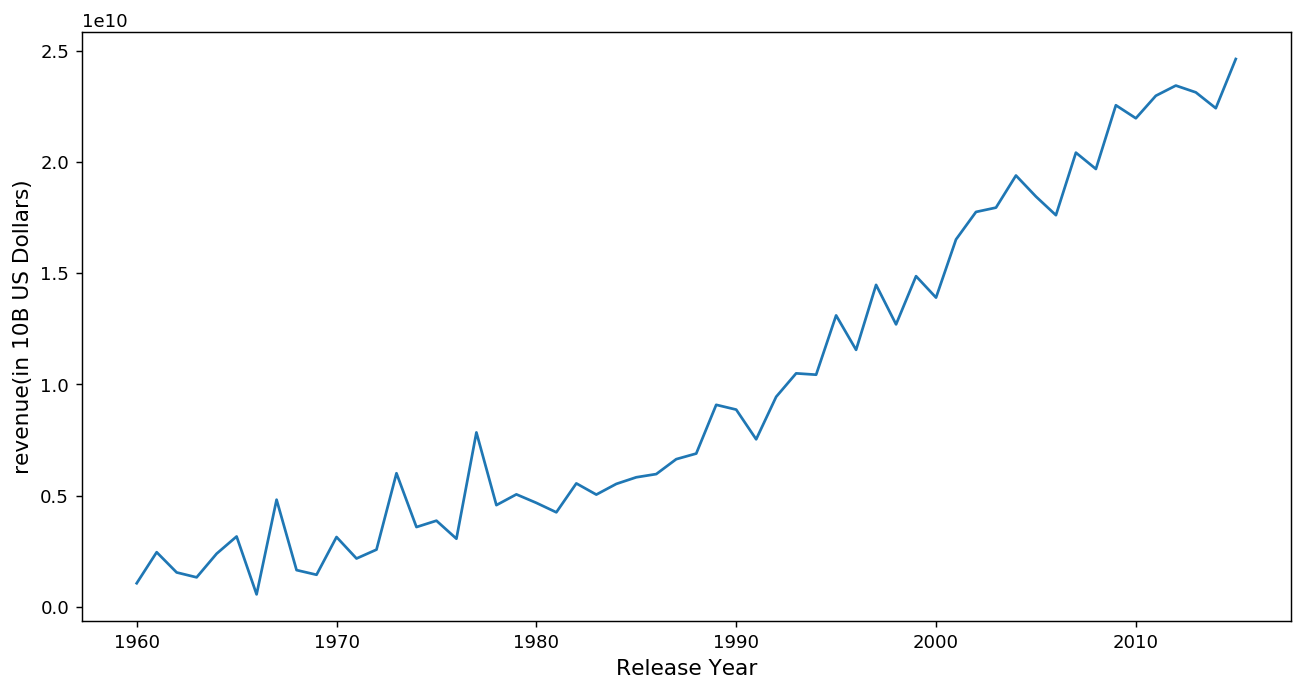

In [34]:
plt.figure(figsize=(12,6), dpi = 130)
plt.plot(revenue)
plt.xlabel("Release Year", fontsize = 12)
plt.ylabel("revenue(in 10B US Dollars)", fontsize = 12);

#### Now,Let's See what year had the highest movie revenues:

In [35]:
revenue.max()

24621443643.124752

The highest Movie budget sum in a year is 24.621 Billion US Dollars,this was in the Year 2015!

#### 4-Movie Ratings:

In [36]:
#Create a rating Data frame
rating_df=imdb_df.copy()
rating_df.shape

(10865, 14)

In [37]:
#Pandas series grouped by release years and summing the average votes for each year
rating=rating_df.groupby("release_year")["vote_average"].mean()

In [38]:
#recreating the data frame with the release year and Average ratings for every year to plot the rating's behaviour
rating_df=df_counter(dictionary_creator(rating))

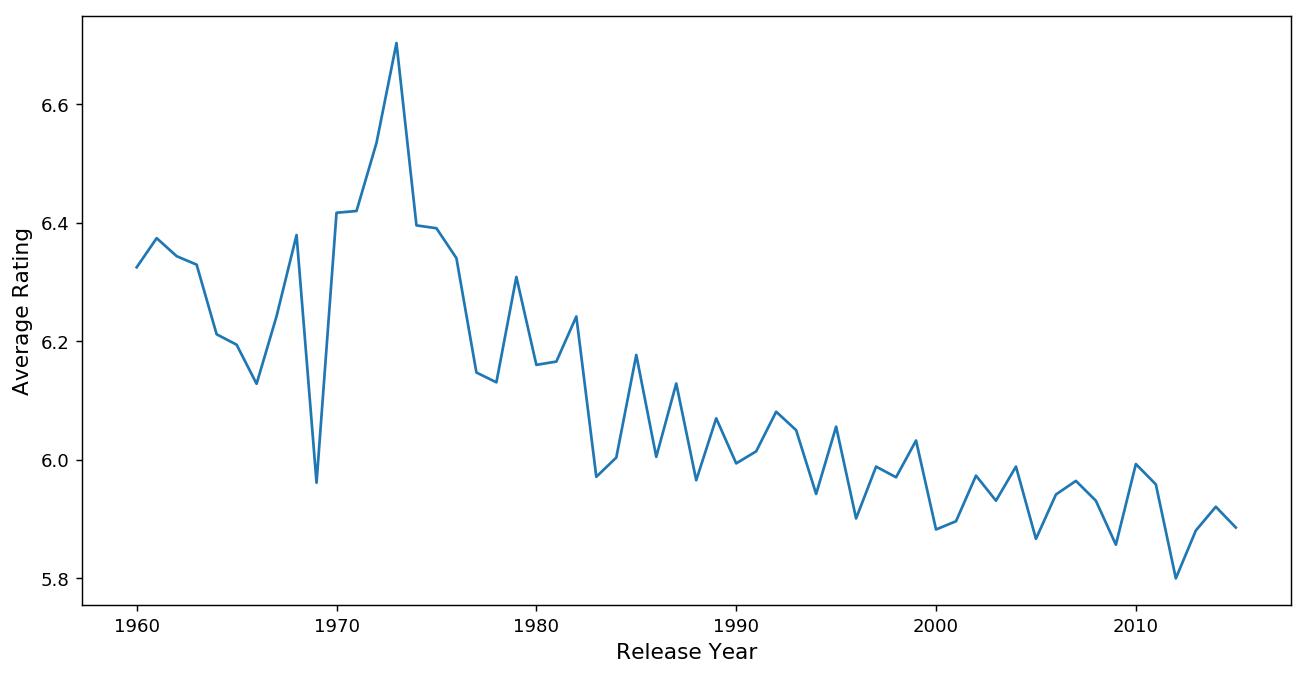

In [39]:
plt.figure(figsize=(12,6), dpi = 130)
plt.plot(rating)
plt.xlabel("Release Year", fontsize = 12)
plt.ylabel("Average Rating", fontsize = 12);

Though it's not exactly accurate,it appears that the movie ratings are in a general decline throughout years!

#### Now,Let's See what year had the highest movie ratings:

In [40]:
rating.max()

6.703636363636363

The highest Average Movie rating in a year is 6.7 ,this was in the Year 1973!
>*Looks like this might be the best year if you are looking for a movie to watch!

#### Research Question 1 Conclusion
    1-Most popular Genres are:
        1-Drama
        2-Comedy
        3-Thriller
        4-Action
        5-Adventure
    2-Movie budgets are increasing rapidly as years pass.
    3-Movie revnues are increasing even more rapidly as years pass.
    4-Movie ratings appear to be generaly declining as years pass.

### Research Question 2  : What Are the properties of A high profit Movie?:
    The Criteria we will use in defining a high profit movie is it's profit being higher than 50 Million US Dollars.
    
    Here, We will explore what are the properties of high profit movies,and what might make a movie profitable.
    We will study these properties in high provit movies:
    1-Movie Generes
    2-Average Movie Budgets
    3-Average Runtime
    4-Most Reccuring Actors
    5-Most Recurring Directors
    We will also see what might be the expected revenue for such a movie.


#### First, Let's create a column for profits:
    We will calculate profits as The Differnece between adjusted revenues and adjusted budgets to account for inflation:

In [52]:
profit_df=imdb_df.copy()
profit_df.insert(14,'profit',profit_df['revenue_adj']-profit_df['budget_adj'])
profit_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


#### Now: Let's make a new data frame with the variables we are going to study only:

In [53]:
profit_df=profit_df.query("profit>= 50000000")

Let's Remove Unnecessary Columns:

In [54]:
unecessary_columns2=["popularity","budget","revenue","production_companies","release_date","release_year","vote_average",]
profit_df.drop(unecessary_columns2,axis=1,inplace=True)

In [55]:
profit_df.head()

,original_title,cast,director,runtime,genres,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09,1.718723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,1.747999e+08,1.385749e+09,1.210949e+09


In [56]:
profit_df.shape

(1722, 8)

Our Movie List has significantly been reduced into 1722 Movies!

#### Now: Let's explore the attributes related to our new Dataset of high profit movies:

#### 1-Movie Genres:

In [57]:
#Function that counts values for every attribute
def profit_counter(attribute):
    attribute_series = pd.Series(profit_df[attribute].str.cat(sep = '|').split(sep = '|'))
    #attribute_values = attribute_series.split(sep = '|'))
    attribute_count = attribute_series.value_counts()
    return attribute_count 

In [58]:
#Bar Grapher for these attributes
def profit_bar_grapher(attribute):
    bar_plotter(dictionary_creator(profit_counter(attribute)))
    

In [59]:
#Pie Chart Grapher for these attributes
def profit_pie_chart(attribute):
    pie_plotter(dictionary_creator(profit_counter(attribute)))

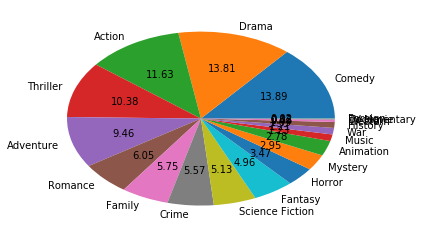

In [60]:
profit_pie_chart("genres")

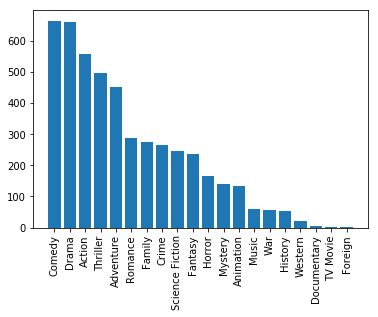

In [61]:
profit_bar_grapher("genres")

#### As we can see,the most recurring 5 genres in terms of high profit (Descendingly) are:
    1-Comedy
    2-Drama
    3-Action
    4-Thriller
    5-Adventure

#### 2-Movie Budget:

In [63]:
#creating a function that calculates the average value of these attributes
def average_attribute(attribute):
    average=profit_df[attribute].mean()
    return average

In [64]:
average_attribute("budget_adj")

57630480.7487897

It appears that the average budget of a high profit Movie is 57.63 Million US Dollars.

#### 3-Movie Runtime:

In [66]:
average_attribute("runtime")

113.31997677119628

It appears that the average runtime of a high profit Movie is around 113 Minutes.

#### 4-Actors:

In [68]:
profit_counter("cast")

Tom Cruise            29
Tom Hanks             27
Brad Pitt             26
Robert De Niro        24
Sylvester Stallone    23
                      ..
Chloe Webb             1
Ben Barnes             1
Isabel Lucas           1
DMX                    1
Linda Hunt             1
Length: 3789, dtype: int64

#### It appears that the 5 most reccuring Actors in high profit movies (Descendingly) are:
    1-Tom Cruise           with 29 Movies
    2-Tom Hanks            with 27 Movies
    3-Brad Pitt            with 26 Movies
    4-Robert De Niro       with 24 Movies
    5-Sylvester Stallone   with 23 Movies


#### 5-Directors:

In [69]:
profit_df.director.value_counts()

Steven Spielberg               25
Clint Eastwood                 20
Robert Zemeckis                13
Ron Howard                     12
Tim Burton                     12
                               ..
Danny Boyle|Loveleen Tandan     1
NimrÃ³d Antal                   1
Wayne Wang                      1
Jim Sharman                     1
Andy Muschietti                 1
Name: director, Length: 789, dtype: int64

#### It appears that the 5 most reccuring Directors in high profit movies (Descendingly) are:
    1-Steven Spielberg               with 25 Movies
    2-Clint Eastwood                 with 20 Movies
    3-Robert Zemeckis                with 13 Movies
    4-Ron Howard                     with 12 Movies
    5-Tim Burton                     with 12 Movies

#### 6-Expected Revenues:

In [70]:
average_attribute("revenue_adj")

274128213.49907815

The expected revenue for a high profit Movie is around 274.13 Million US Dollars

#### 7-Expected Profit:

In [71]:
average_attribute("profit")

216497732.75028846

It appears that the expected profit for a Movie with the previously Mentioned attributes is around 216.5 Million US Dollars

## This was an Overall intersting data set to Work With,now it's time for our final conclusion:
<a id='conclusions'></a>
## Conclusions
    Research Question 1 Conclusion:
    1-Most popular Genres are:
        1-Drama
        2-Comedy
        3-Thriller
        4-Action
        5-Adventure
    2-Movie budgets are increasing rapidly as years pass.
    3-Movie revnues are increasing even more rapidly as years pass.
    4-Movie ratings appear to be generaly declining as years pass.
    
### Research Question 2 What are the properties of high profit movies:
    1-Average Profit is 216.5 Million US Dollars
    2-Average Budget is 57.63 Million US Dollars
    3-Average Revenue is 274.13 Million US Dollars
    4-Average Runtime is 113 Minutes
    
    5-Most recurring Genres in high profit Movies are:
        1-Comedy
        2-Drama
        3-Action
        4-Thriller
        5-Adventure
    
    6-Most recurring Actors in high profit Movies are:
    1-Tom Cruise           with 29 Movies
    2-Tom Hanks            with 27 Movies
    3-Brad Pitt            with 26 Movies
    4-Robert De Niro       with 24 Movies
    5-Sylvester Stallone   with 23 Movies
    
    7-Most recurring Directors in high profit Movies are:
    1-Steven Spielberg               with 25 Movies
    2-Clint Eastwood                 with 20 Movies
    3-Robert Zemeckis                with 13 Movies
    4-Ron Howard                     with 12 Movies
    5-Tim Burton                     with 12 Movies
    
### Limitations

    1-We are not sure of the currency used in each movie's budget,revneue...etc,I assumed it to be in US Dollars since that,s the most convineint currency in most cases.
    2-There are around 1030 Missing values in the "Production Companies" column in the main dataset,which might signficantly affect our analysis if we decided to study this attribute.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])